<font size="5">**Projet : Explorer et comprendre les performances des employés**</font>

<font size="5">**Etape 1: Définition de la problématique**

<font size="4,5">**Votre mission**

Votre mission est d'étudier les distributions des scores de performance et des heures
travaillées pour détecter les facteurs d'amélioration.

<font size="4,5">**Contexte**

Une entreprise souhaite analyser la répartition des performances des
employés pour comprendre les écarts et identifier les outliers.
Ce projet utilise le dataset HR Analytics Dataset de Kaggle, regroupant des informations détaillées sur les employés.


<font size="5">**Etape 2 : Collecte et prétraitement des données**

<font size="4,5">**Collecte des données**

La deuxième étape du projet consiste à obtenir les données nécessaires pour détecter les facteurs d'amélioration des employés.

Ces données peuvent provenir de différentes sources :

- **Bases de données internes** : informations détaillées sur les employés.
- **Fichiers CSV/Excel** : données exportées depuis un CRM.
- **API externes** : récupération de données complémentaires.
- **Données synthétiques** : en l'absence de données réelles, on peut générer des jeux de données simulés.

Dans notre cas, nous utilisons le dataset HR Analytics Dataset, disponible [📥 Kaggle](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set).

Note : nous anonymisons les données en vue du respect des données sensibles.

In [3]:
import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv("HRDataset_v14.csv")
# Anonymisation immédiate
df['Employee_Name'] = 'Employee_' + df.index.astype(str)
df['EmpID'] = df.index + 1000  # exemple d’ID générique
df = df.drop(columns=['ManagerName', 'ManagerID'])  # supprimer les colonnes nominatives

# Poursuivre ensuite avec les analyses sur df anonymisé



In [5]:
# Aperçu des premières lignes
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Employee_0,1000,0,0,1,1,5,4,0,62506,...,Active,Production,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,Employee_1,1001,1,1,1,5,3,3,0,104437,...,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,Employee_2,1002,1,1,0,5,5,3,0,64955,...,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,Employee_3,1003,1,1,0,1,5,3,0,64991,...,Active,Production,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,Employee_4,1004,0,2,0,5,5,3,0,50825,...,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [7]:
# Aperçu des dernières lignes
df.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,Employee_306,1306,0,0,1,1,5,3,0,65893,...,Active,Production,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,Employee_307,1307,0,0,0,5,5,1,0,48513,...,Voluntarily Terminated,Production,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,Employee_308,1308,0,0,0,1,3,4,0,220450,...,Active,IT/IS,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,Employee_309,1309,0,0,0,1,3,3,0,89292,...,Active,IT/IS,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,Employee_310,1310,0,4,0,1,5,3,0,45046,...,Active,Production,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


In [9]:
# Vérification des dimensions
print("Dimensions du dataset :", df.shape)

Dimensions du dataset : (311, 34)


In [11]:
# Obtenir l'ensemble des colonnes de la base
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

## Description des variables
| Variable                  |  Description                                           |       
|---------------------------|--------------------------------------------------------|
| Employee_Name             |  Nom de l'employé                                      |
| EmpID                     |  Identifiant de l'employé                              |                         
| MarriedID                 |  Identifiant de la situation maritale                  |                                    
| MaritalStatusID           |  Identifiant du statut marital                         |                              
| GenderID                  |  Identifiant du genre de l'employé                     |                                 
| EmpStatusID               |  Identifiant du statut de l'employé                    |                                  
| DeptID                    |  Identifiant du département de l'employé               |                                                                  | PerfScoreID               |  Identifiant du score de performance de l'employé      |                                                      
| FromDiversityJobFairID    |  Emploi trouvé lors d'un salon                         |
| Salary                    |  Salaire                                               |
| Termd                     |  Etat du contrat : actif ou rompu                      |
| PositionID                |  Identifiant du poste                                  |
| Position                  |  Poste                                                 |
| State                     |  Etat                                                  |
| Zip                       |  Code postal                                           |
| DOB                       |  Date de naissance                                     |
| Sex                       |  Sexe                                                  |
| MaritalDesc               |  Statut marital                                        |
| CitizenDesc               |  Nationalité                                           |
| HispanicLatino            |  Hispanique latino : oui ou non                        |                  
| Racedesc                  |  Origine ethnique                                      |
| DateofHire                |  Date d'embauche                                       |
| DateofTermination         |  Date de fin de contrat                                |       
| TermReason                |  Modalités du contrat                                  |
| EmploymentStatus          |  Statut du contrat                                     |
| Department                |  Département                                           |                                                                 
| RecruitmentSource         |  Source de recrutement                                 |
| PerformanceScore          |  Score de performance                                  |
| EngagementSurvey          |  Evaluation de l'engagement du salarié                 |
| EmpSatisfaction           |  Satisfaction de l'employé                             |
| SpecialProjectsCount      |  Nombre de projets spéciaux                            |
| LastPerformanceReview_Date|  Dernière évaluation de performance                    |
| DaysLateLast30            |  Nombre de retards sur les 30 derniers jours           |
| Absences                  |  Nombre d'absences                                     |
  

In [14]:
# Informations sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Prétraitement des données

## Nettoyage des données

### Conversion de `DOB`, `DateofHire` et `DateofTermination` en dates.

Les valeurs des colonnes `DOB`, `DateofHire` et `DateofTermination` sont actuellement stockées sous forme de chaînes de caractères, ce qui peut poser problème pour les calculs ou les analyses ultérieures. Nous devons donc les convertir en dates.


In [16]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df.info() #Vérification de la transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\2574901016.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


## Conversion de `MarriedID`, `MaritalStatusID`, `Gender ID`, `EmpStatusID`, `DeptID`, `PerfScoreID`, `FromDiversityJobFairID`, `Termd` en variables catégorielles (object).

En effet, elles sont actuellement sous forme d'integers (quantitatives) alors qu'elles sont pourtant qualitatives avec un maximum de 5 paliers différents (O, 1, 2, 3, 4, 5). 


In [18]:
df['MarriedID'] = df['MarriedID'].astype('object')
df['MaritalStatusID'] = df['MaritalStatusID'].astype('object')
df['GenderID'] = df['GenderID'].astype('object')
df['EmpStatusID'] = df['EmpStatusID'].astype('object')
df['DeptID'] = df['DeptID'].astype('object')
df['PerfScoreID'] = df['PerfScoreID'].astype('object')
df['FromDiversityJobFairID'] = df['FromDiversityJobFairID'].astype('object')
df['Termd'] = df['Termd'].astype('object')
df['EmpSatisfaction'] = df['EmpSatisfaction'].astype('object')
df.info() #Vérification de la transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    object        
 3   MaritalStatusID             311 non-null    object        
 4   GenderID                    311 non-null    object        
 5   EmpStatusID                 311 non-null    object        
 6   DeptID                      311 non-null    object        
 7   PerfScoreID                 311 non-null    object        
 8   FromDiversityJobFairID      311 non-null    object        
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    object        
 11  PositionID                  311 non-null    int64         

## Identification et traitement des valeurs manquantes
Nous devons identifier les valeurs manquantes et choisir la meilleure stratégie pour les traiter.


In [20]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfactio

In [22]:
# Proportion des valeurs manquantes
print(df.isnull().mean())

Employee_Name                 0.000000
EmpID                         0.000000
MarriedID                     0.000000
MaritalStatusID               0.000000
GenderID                      0.000000
EmpStatusID                   0.000000
DeptID                        0.000000
PerfScoreID                   0.000000
FromDiversityJobFairID        0.000000
Salary                        0.000000
Termd                         0.000000
PositionID                    0.000000
Position                      0.000000
State                         0.000000
Zip                           0.000000
DOB                           0.000000
Sex                           0.000000
MaritalDesc                   0.000000
CitizenDesc                   0.000000
HispanicLatino                0.000000
RaceDesc                      0.000000
DateofHire                    0.000000
DateofTermination             0.665595
TermReason                    0.000000
EmploymentStatus              0.000000
Department               

## Traitement des valeurs manquantes
Dans ce traitement, nous nous concentrons sur la gestion des valeurs manquantes dans les colonnes Date of Termination et Manager ID. 

Etant donné que les valeurs manquantes de la colonne Date of Termination sont nombreuses mais s'expliquent par le fait que les employés sont toujours en poste, je les laisse telles quelles.

Etant donné que les valeurs manquantes de la colonne Manager ID représentent une faible proportion des données, nous avons choisi de les supprimer plutôt que de les imputer. Cette approche est justifiée par les raisons suivantes :

1. **Proportion faible de valeurs manquantes** : les valeurs manquantes représentent une petite proportion des données totales. En supprimant ces lignes, nous ne perdons qu'une faible quantité d'information, ce qui n'affecte pas de manière significative les résultats.

2. **Simplicité et efficacité** : Supprimer les lignes avec des valeurs manquantes est plus simple et plus rapide que d'imputer ces valeurs. Cela évite également d'introduire des biais ou erreurs dans les données en imitant des valeurs manquantes par des moyennes ou médianes.



In [26]:
# Proportion des valeurs manquantes
print(df.isnull().mean())

Employee_Name                 0.000000
EmpID                         0.000000
MarriedID                     0.000000
MaritalStatusID               0.000000
GenderID                      0.000000
EmpStatusID                   0.000000
DeptID                        0.000000
PerfScoreID                   0.000000
FromDiversityJobFairID        0.000000
Salary                        0.000000
Termd                         0.000000
PositionID                    0.000000
Position                      0.000000
State                         0.000000
Zip                           0.000000
DOB                           0.000000
Sex                           0.000000
MaritalDesc                   0.000000
CitizenDesc                   0.000000
HispanicLatino                0.000000
RaceDesc                      0.000000
DateofHire                    0.000000
DateofTermination             0.665595
TermReason                    0.000000
EmploymentStatus              0.000000
Department               

## Identification et Traiement des valeurs aberrantes
Une **valeur aberrante** (ou outlier en anglais) est une valeur qui se distingue de manière significative des autres valeurs dans un jeu de données. Ces valeurs sont considérées comme inhabituelles ou extrêmes par rapport aux autres observations. Les valeurs aberrantes peuvent :

- **Perturber les statistiques descriptives** : Elles peuvent fausser des mesures comme la moyenne, l'écart-type, et d'autres mesures de tendance centrale.
- **Influencer les résultats des modèles de machine learning** : Elles peuvent rendre les modèles trop sensibles et affecter leur performance sur les données réelles.
Les valeurs aberrantes peuvent être causées par des erreurs de saisie, des mesures exceptionnelles ou des observations rares mais valides. Dans certains cas, elles doivent être éliminées ou traitées pour garantir des résultats fiables.

### Identification et traitement des valeurs aberrantes avec l'IQR (Interquartile Range)
L'IQR est une méthode couramment utilisée pour détecter les valeurs aberrantes dans un jeu de données. Elle repose sur la **différence entre le troisième quartile (Q3)** et le **premier quartile (Q1)**, qui divise les données en quatre parties égales.

#### 1. Calcul de l'IQR :
**Q1** (premier quartile) : Médiane de la première moitié des données.
**Q3** (troisième quartile) : Médiane de la seconde moitié des données.
**IQR = Q3 - Q1**.
#### 2. Détection des valeurs aberrantes :
Les valeurs aberrantes sont définies comme celles qui sont situées en dehors des limites suivantes :

**Limite inférieure** : ( Q1 - 1.5 \times IQR )
**Limite supérieure** : ( Q3 + 1.5 \times IQR )
Si une valeur est inférieure à la limite inférieure ou supérieure à la limite supérieure, elle est considérée comme une valeur aberrante.

#### 3. Traitement des valeurs aberrantes :
Une fois identifiées, les valeurs aberrantes peuvent être :

Supprimées : Si elles sont considérées comme des erreurs ou des anomalies.
Imputées : Remplacées par une valeur comme la moyenne ou la médiane.
Conservées : Si elles sont jugées importantes pour l'analyse.


In [28]:
# description des variables (min, max, etc) pour avoir une première idée
df.describe()

,EmpID,Salary,PositionID,Zip,DOB,DateofHire,DateofTermination,EngagementSurvey,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311.000000
mean,1155.000000,69020.684887,16.845659,6555.482315,2008-05-11 18:54:24.308681728,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,4.110000,1.218650,0.414791,10.237942
min,1000.000000,45046.000000,1.000000,1013.000000,1975-03-10 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,1.120000,0.000000,0.000000,1.000000
25%,1077.500000,55501.500000,18.000000,1901.500000,1981-11-09 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,3.690000,0.000000,0.000000,5.000000
50%,1155.000000,62810.000000,19.000000,2132.000000,1986-11-07 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,4.280000,0.000000,0.000000,10.000000
75%,1232.500000,72036.000000,20.000000,2355.000000,2060-07-19 00:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,4.700000,0.000000,0.000000,15.000000
max,1310.000000,250000.000000,30.000000,98052.000000,2074-12-21 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,5.000000,8.000000,6.000000,20.000000
std,89.922189,25156.636930,6.223419,16908.396884,NaN,NaN,NaN,0.789938,2.349421,1.294519,5.852596


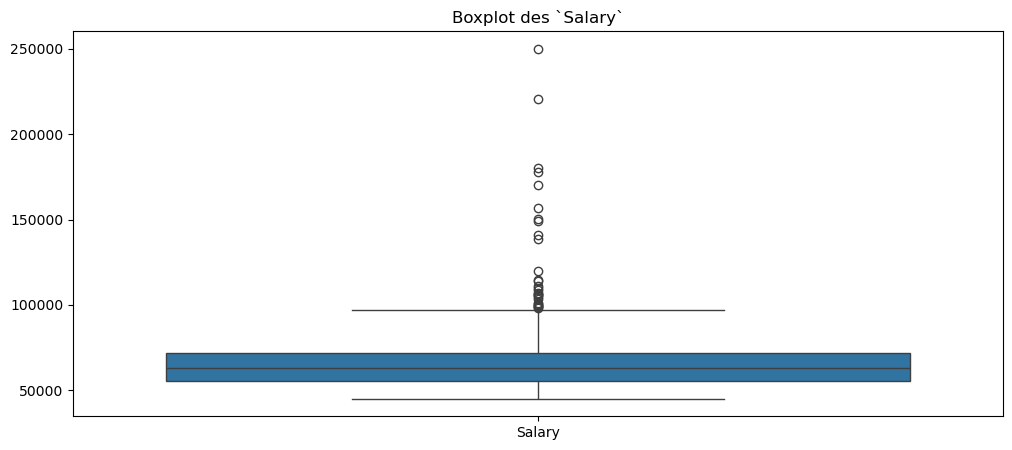

In [30]:
# Visualisation des valeurs aberrantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Salary']])
plt.title("Boxplot des `Salary`")

plt.show()

# Etape 3: Exploration et Analyse des Données (EDA)
L'exploration et l'analyse des données (EDA) est une étape cruciale dans le processus de préparation des données. Cela permet de mieux comprendre la structure, les relations et les anomalies dans les données avant de procéder à la modélisation. Ce processus inclut plusieurs étapes clés, telles que la description statistique des variables, la création de visualisations pertinentes, et l'analyse des corrélations.

### Analyses univariées
## Analyse des variables numériques

Nous commençons par calculer des mesures statistiques de base pour obtenir un aperçu des distributions des variables numériques.

- **Moyenne** : La valeur moyenne des données, donnant une idée du centre des données.
- **Médiane** : Le point central des données, utile pour détecter la symétrie ou l'asymétrie des distributions.
- **Écart-type** (Standard Deviation) : La dispersion des données autour de la moyenne.
- **Variance** : Une autre mesure de la dispersion des données, qui est l'écart-type au carré.
- **Min/Max** : Les valeurs minimales et maximales, permettant d'observer l'étendue des données.
- **Quartiles (Q1, Q3)** : Les valeurs qui divisent les données en quartiles, permettant d'étudier la dispersion des données.
- **Interquartile Range (IQR)** : La plage entre le premier et le troisième quartile, utile pour détecter les valeurs aberrantes.


Cela permet de mieux comprendre la tendance centrale et la dispersion des variables.

In [32]:
# Statistiques descriptives
df.describe()

,EmpID,Salary,PositionID,Zip,DOB,DateofHire,DateofTermination,EngagementSurvey,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311.000000
mean,1155.000000,69020.684887,16.845659,6555.482315,2008-05-11 18:54:24.308681728,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,4.110000,1.218650,0.414791,10.237942
min,1000.000000,45046.000000,1.000000,1013.000000,1975-03-10 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,1.120000,0.000000,0.000000,1.000000
25%,1077.500000,55501.500000,18.000000,1901.500000,1981-11-09 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,3.690000,0.000000,0.000000,5.000000
50%,1155.000000,62810.000000,19.000000,2132.000000,1986-11-07 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,4.280000,0.000000,0.000000,10.000000
75%,1232.500000,72036.000000,20.000000,2355.000000,2060-07-19 00:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,4.700000,0.000000,0.000000,15.000000
max,1310.000000,250000.000000,30.000000,98052.000000,2074-12-21 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,5.000000,8.000000,6.000000,20.000000
std,89.922189,25156.636930,6.223419,16908.396884,NaN,NaN,NaN,0.789938,2.349421,1.294519,5.852596


## Visualisation des Variables Numériques

Il est important de visualiser les distributions, tendances et de détecter d’éventuelles valeurs aberrantes pour les variables numériques. Voici un tableau des graphiques couramment utilisés pour les variables numériques, leur définition et leur utilisation :

| Type de graphique | Définition                                                                                       | Utilisation                                                                                             |
|-------------------|--------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Histogramme**   | Un graphique montrant la fréquence des données dans des intervalles (bins). Chaque barre représente le nombre d’occurrences dans un intervalle de valeurs. | Utilisé pour observer la distribution des données, analyser la forme de la distribution (normale, asymétrique), et identifier les pics de fréquence.  |
| **Boxplot**       | Un graphique montrant les quartiles d'une variable et les valeurs aberrantes sous forme de "whiskers". | Permet de visualiser la dispersion des données, détecter les outliers (valeurs aberrantes) et observer l'asymétrie de la distribution. |
| **KDE Plot**      | Un graphique de densité qui lisse les données pour estimer la densité de probabilité.             | Utilisé pour visualiser la distribution des données d'une manière fluide, sans les effets dus à la granularité des bins d'un histogramme. |
| **Violin Plot**   | Un graphique combinant un boxplot et un KDE plot pour afficher la densité des données à différents niveaux de la variable. | Permet de visualiser la distribution des données, particulièrement lorsqu'il y a plusieurs modes (groupes) dans les données. |


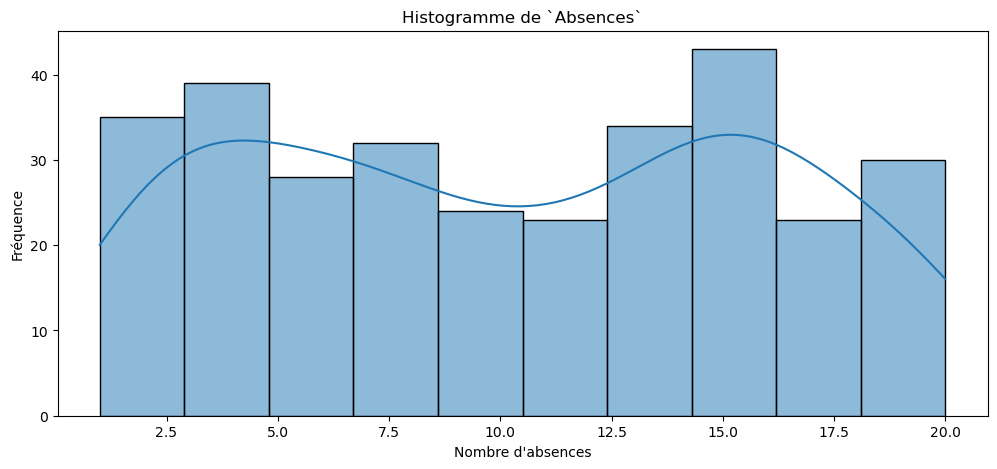

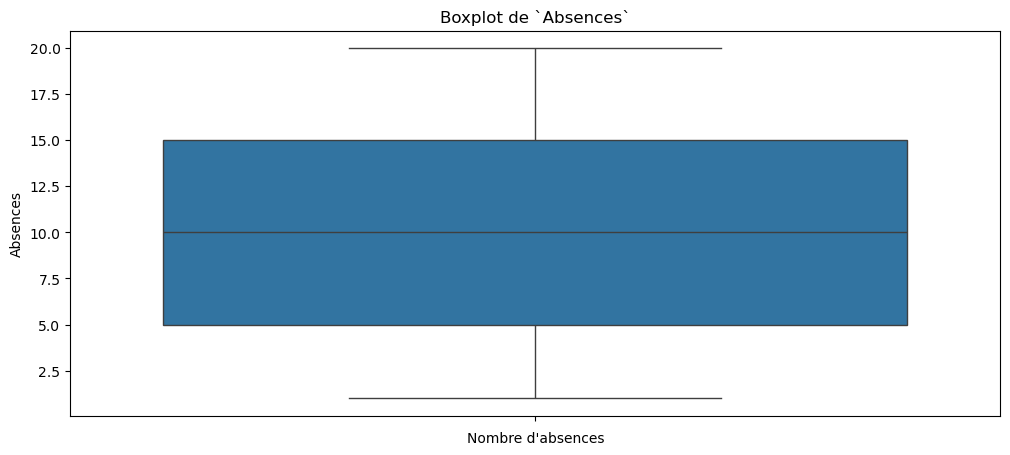

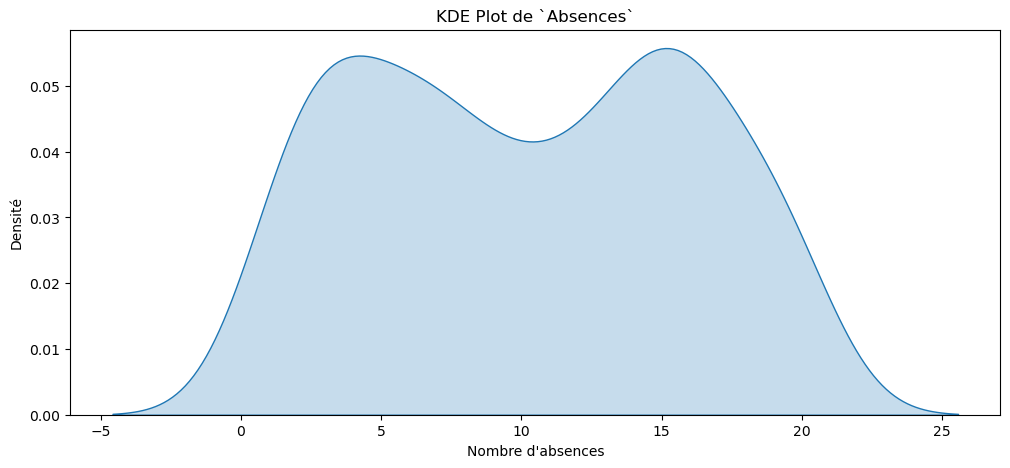

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de graphique pour la variable 'Absences'

# 1. Histogramme
plt.figure(figsize=(12, 5))
sns.histplot(df['Absences'], kde=True)  # Utilisation de kde=True pour ajouter la courbe de densité
plt.title("Histogramme de `Absences`")
plt.xlabel("Nombre d'absences")
plt.ylabel("Fréquence")
plt.show()

# 2. Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df['Absences'])
plt.title("Boxplot de `Absences`")
plt.xlabel("Nombre d'absences")
plt.show()

# 3. KDE Plot

plt.figure(figsize=(12, 5))
sns.kdeplot(df['Absences'], fill=True)  # Remplacement de 'shade=True' par 'fill=True'
plt.title("KDE Plot de `Absences`")
plt.xlabel("Nombre d'absences")
plt.ylabel("Densité")
plt.show()


# Maintenant, essayez de faire de même pour d'autres variables numériques comme `Salary`, `PerformanceScore`.


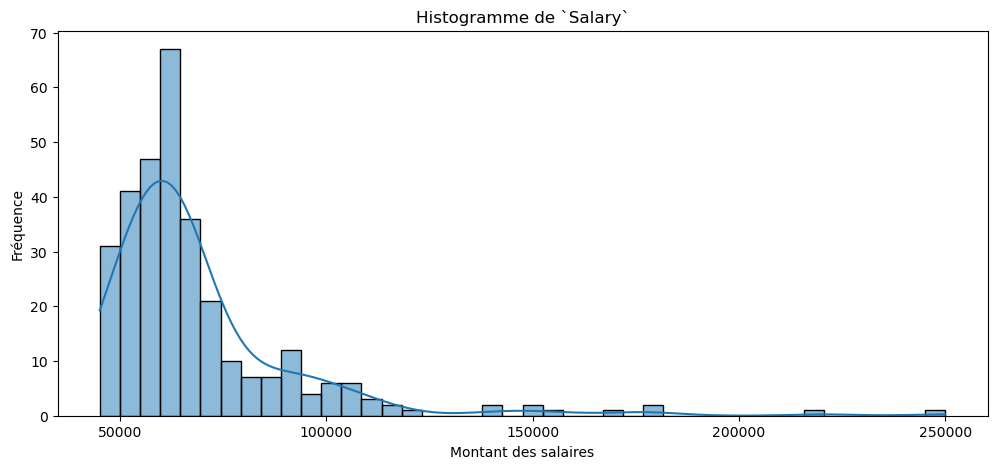

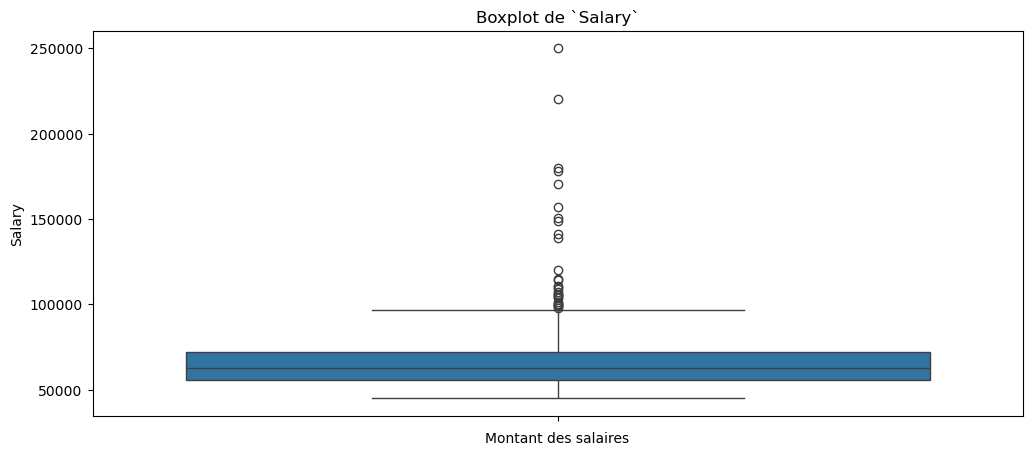

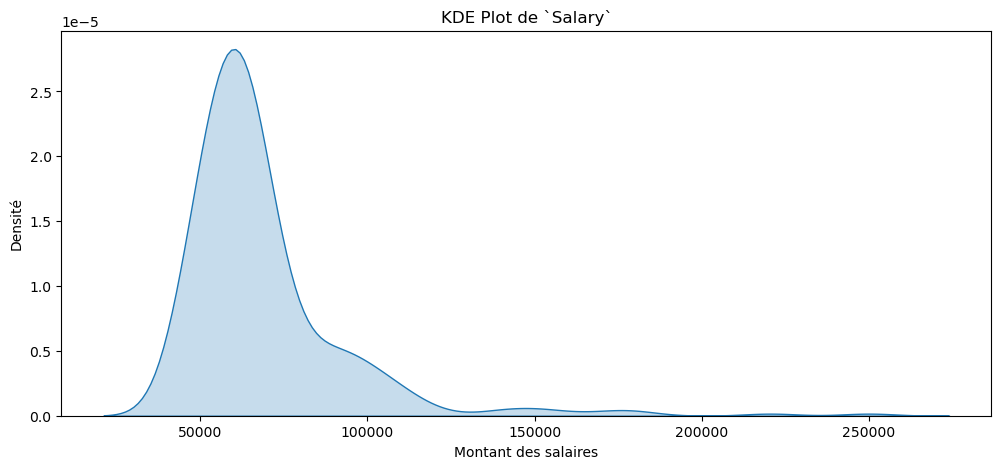

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de graphique pour la variable 'Salary'

# 1. Histogramme
plt.figure(figsize=(12, 5))
sns.histplot(df['Salary'], kde=True)  # Utilisation de kde=True pour ajouter la courbe de densité
plt.title("Histogramme de `Salary`")
plt.xlabel("Montant des salaires")
plt.ylabel("Fréquence")
plt.show()

# 2. Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df['Salary'])
plt.title("Boxplot de `Salary`")
plt.xlabel("Montant des salaires")
plt.show()

# 3. KDE Plot

plt.figure(figsize=(12, 5))
sns.kdeplot(df['Salary'], fill=True)  # Remplacement de 'shade=True' par 'fill=True'
plt.title("KDE Plot de `Salary`")
plt.xlabel("Montant des salaires")
plt.ylabel("Densité")
plt.show()


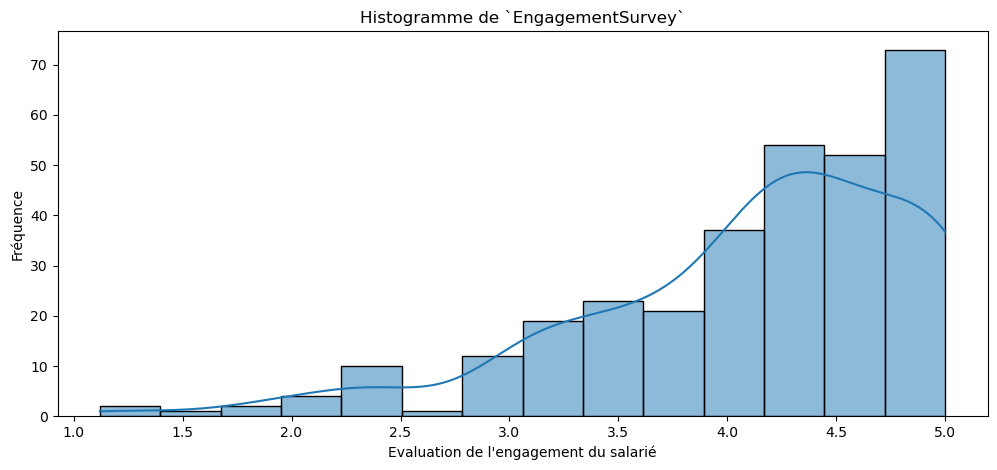

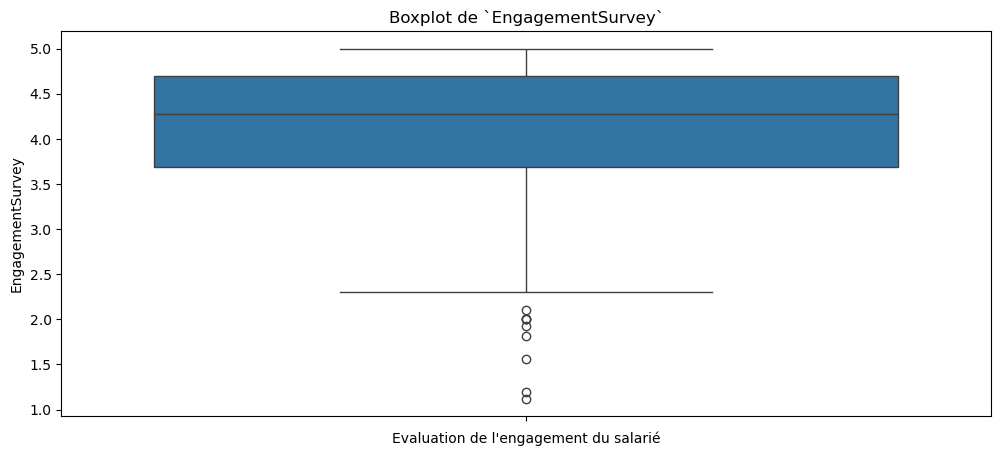

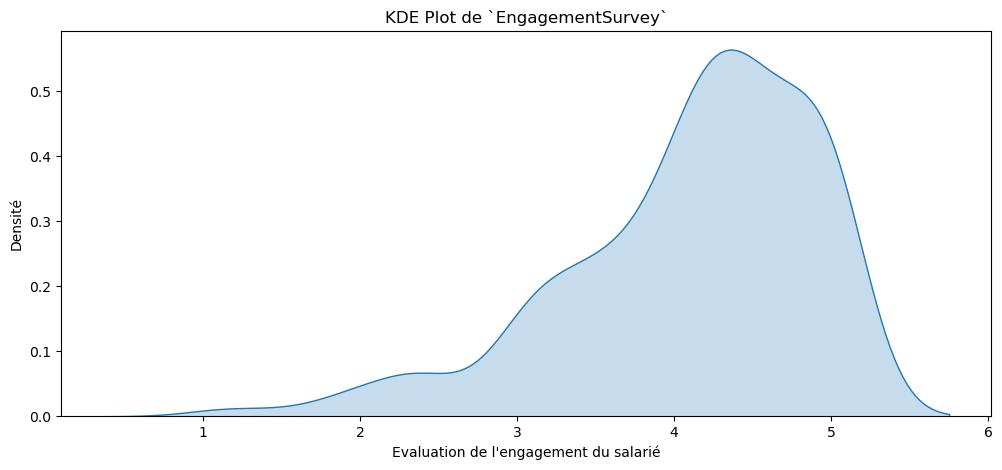

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de graphique pour la variable 'EngagementSurvey'

# 1. Histogramme
plt.figure(figsize=(12, 5))
sns.histplot(df['EngagementSurvey'], kde=True)  # Utilisation de kde=True pour ajouter la courbe de densité
plt.title("Histogramme de `EngagementSurvey`")
plt.xlabel("Evaluation de l'engagement du salarié")
plt.ylabel("Fréquence")
plt.show()

# 2. Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df['EngagementSurvey'])
plt.title("Boxplot de `EngagementSurvey`")
plt.xlabel("Evaluation de l'engagement du salarié")
plt.show()

# 3. KDE Plot

plt.figure(figsize=(12, 5))
sns.kdeplot(df['EngagementSurvey'], fill=True)  # Remplacement de 'shade=True' par 'fill=True'
plt.title("KDE Plot de `EngagementSurvey`")
plt.xlabel("Evaluation de l'engagement du salarié")
plt.ylabel("Densité")
plt.show()

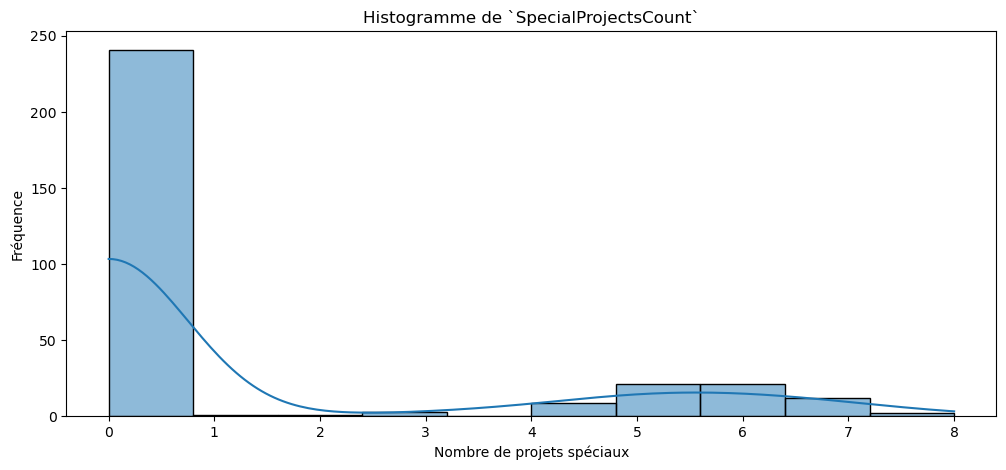

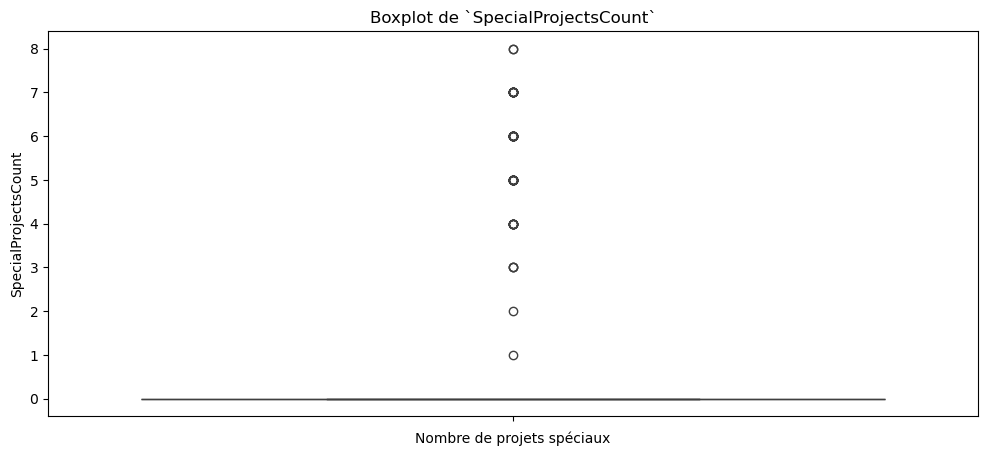

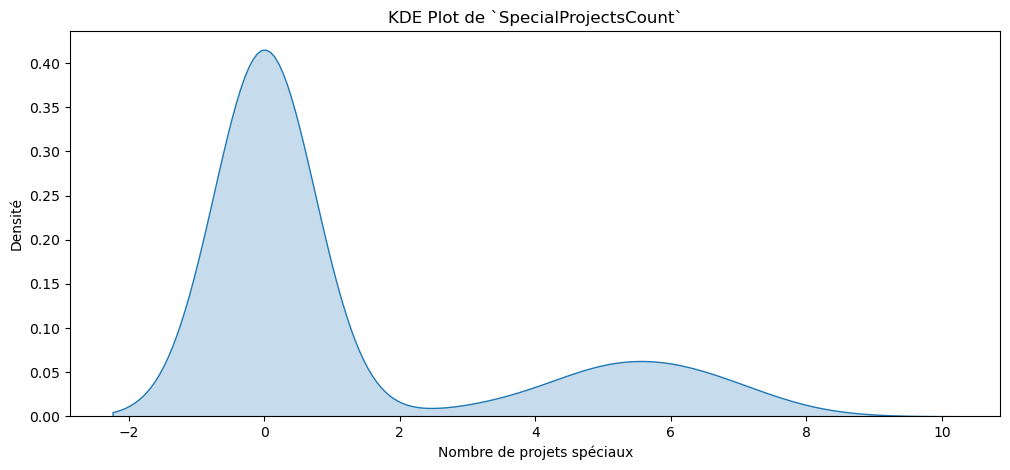

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de graphique pour la variable 'SpecialProjectsCount'

# 1. Histogramme
plt.figure(figsize=(12, 5))
sns.histplot(df['SpecialProjectsCount'], kde=True)  # Utilisation de kde=True pour ajouter la courbe de densité
plt.title("Histogramme de `SpecialProjectsCount`")
plt.xlabel("Nombre de projets spéciaux")
plt.ylabel("Fréquence")
plt.show()

# 2. Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df['SpecialProjectsCount'])
plt.title("Boxplot de `SpecialProjectsCount`")
plt.xlabel("Nombre de projets spéciaux")
plt.show()

# 3. KDE Plot

plt.figure(figsize=(12, 5))
sns.kdeplot(df['SpecialProjectsCount'], fill=True)  # Remplacement de 'shade=True' par 'fill=True'
plt.title("KDE Plot de `SpecialProjectsCount`")
plt.xlabel("Nombre de projets spéciaux")
plt.ylabel("Densité")
plt.show()

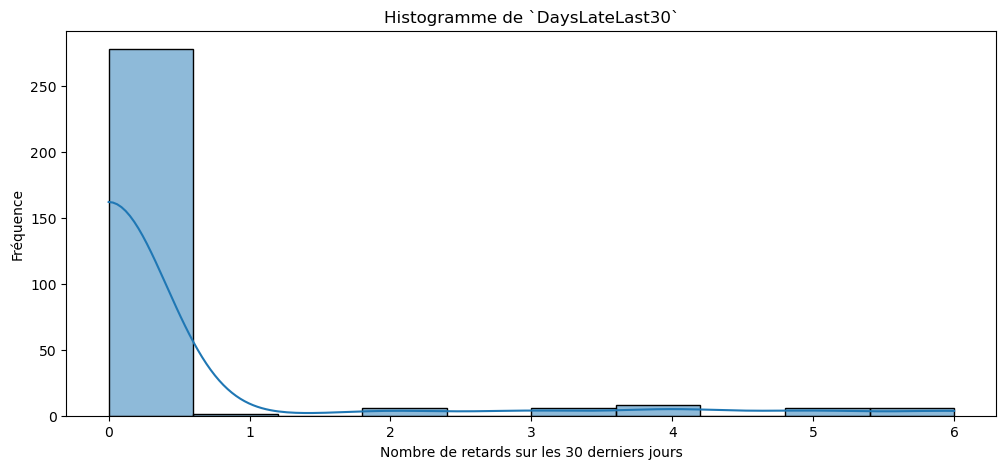

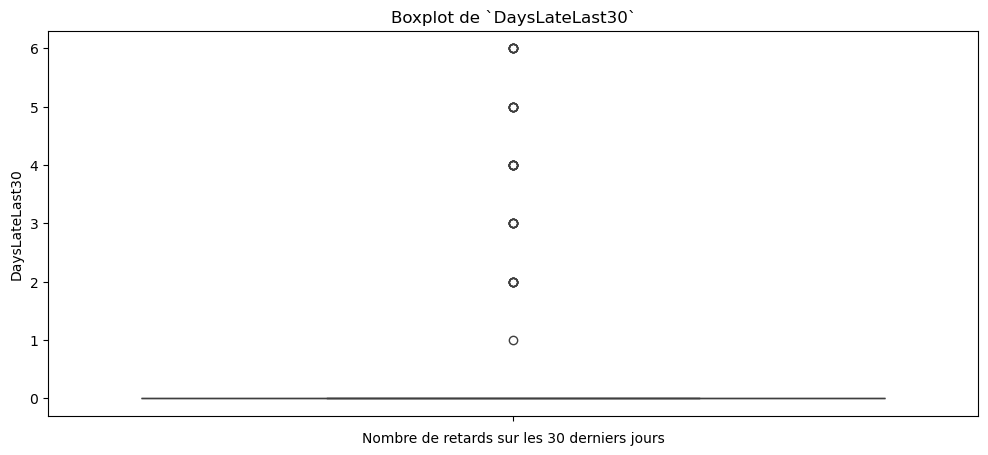

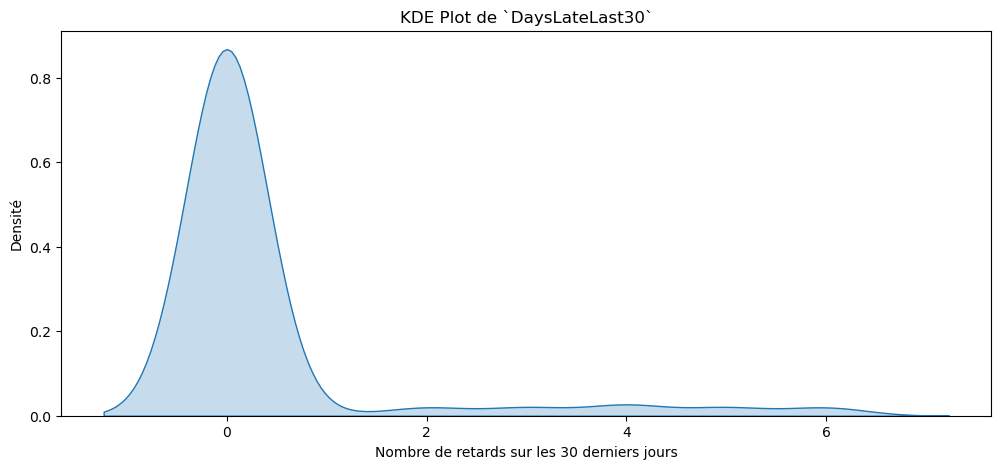

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de graphique pour la variable 'DaysLateLast30'

# 1. Histogramme
plt.figure(figsize=(12, 5))
sns.histplot(df['DaysLateLast30'], kde=True)  # Utilisation de kde=True pour ajouter la courbe de densité
plt.title("Histogramme de `DaysLateLast30`")
plt.xlabel("Nombre de retards sur les 30 derniers jours")
plt.ylabel("Fréquence")
plt.show()

# 2. Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df['DaysLateLast30'])
plt.title("Boxplot de `DaysLateLast30`")
plt.xlabel("Nombre de retards sur les 30 derniers jours")
plt.show()

# 3. KDE Plot

plt.figure(figsize=(12, 5))
sns.kdeplot(df['DaysLateLast30'], fill=True)  # Remplacement de 'shade=True' par 'fill=True'
plt.title("KDE Plot de `DaysLateLast30`")
plt.xlabel("Nombre de retards sur les 30 derniers jours")
plt.ylabel("Densité")
plt.show()

### Analyse numérique des Variables Qualitatives

Les variables qualitatives peuvent être analysées avec les indicateurs suivants :

- **Fréquence (Count)** : Le nombre d'occurrences de chaque catégorie dans une variable. Cela permet de comprendre combien de fois chaque catégorie apparaît dans les données.

- **Proportion (Percentage)** : La proportion de chaque catégorie par rapport au total des observations. Cela permet de visualiser la distribution relative des catégories dans l'ensemble des données.

- **Mode** : La catégorie qui apparaît le plus fréquemment dans la variable. Cela permet de savoir quelle catégorie est la plus courante dans les données.

Ces indicateurs aident à mieux comprendre la répartition des catégories et leur prévalence au sein des données.


In [44]:
# Fréquence des catégories
df['Sex'].value_counts()


Sex
F     176
M     135
Name: count, dtype: int64

In [46]:
# Proportion des catégories
df['Sex'].value_counts(normalize=True)

Sex
F     0.565916
M     0.434084
Name: proportion, dtype: float64

## 2.3 Visualisation des Variables Catégorielles

Les variables catégorielles doivent être visualisées à l’aide de graphiques permettant de voir la fréquence des différentes catégories. Voici un tableau des graphiques couramment utilisés pour les variables qualitatives, leur définition et leur utilisation :

| Type de graphique              | Définition                                                                                                                                   | Utilisation                                                                                                                   |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
| **Diagramme à barres**         | Un graphique montrant la fréquence ou la proportion de chaque catégorie d'une variable catégorielle sous forme de barres verticales ou horizontales. | Utilisé pour comparer la fréquence des différentes catégories d'une variable et détecter les catégories dominantes.           |
| **Diagramme circulaire (Pie chart)** | Un graphique circulaire qui montre la proportion de chaque catégorie par rapport au total.                                                 | Permet de visualiser rapidement la répartition des catégories dans une variable, utile pour des variables avec un nombre limité de catégories. |


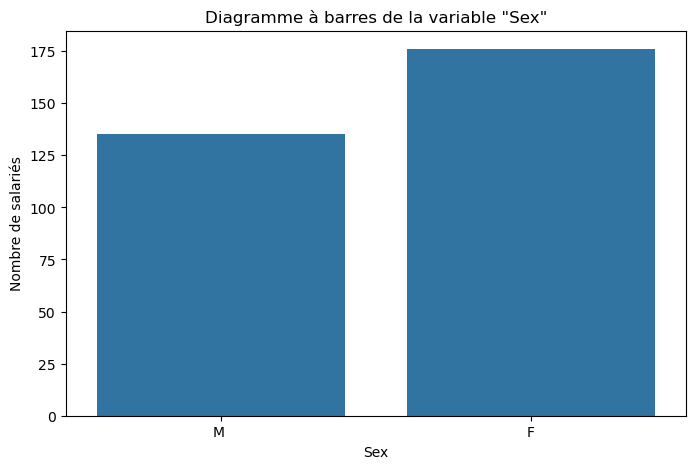

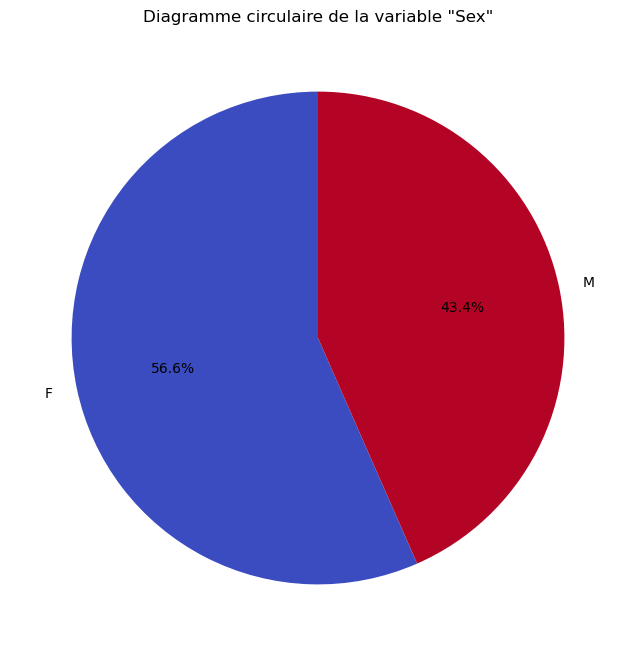

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\498160083.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Sex_counts.index, y=Sex_counts.values, palette='Set1')  # Utilisation de Sex_counts pour les x et y


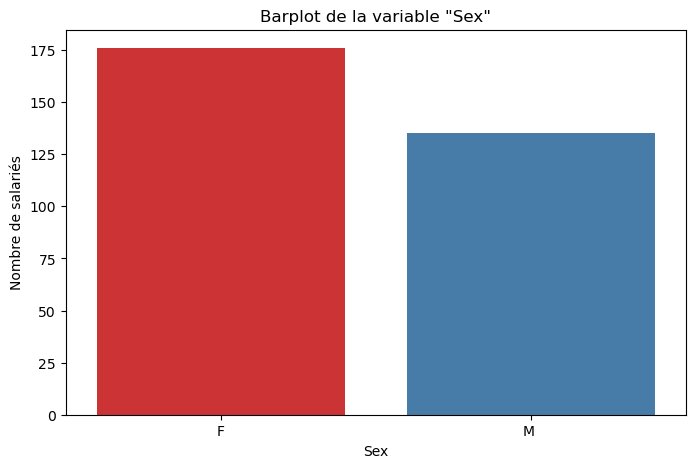

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'Sex'
# Remplacer 'Sex' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)  # Remplacer 'Sex' par la variable souhaitée
plt.title('Diagramme à barres de la variable "Sex"')
plt.xlabel('Sex')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
Sex_counts = df['Sex'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
Sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de Sex_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "Sex"')
plt.ylabel('')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()


#3. Diagramme en barre
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=Sex_counts.index, y=Sex_counts.values, palette='Set1')  # Utilisation de Sex_counts pour les x et y
plt.title('Barplot de la variable "Sex"')
plt.xlabel('Sex')
plt.ylabel('Nombre de salariés')
plt.show()


In [50]:
# Fréquence des catégories
df['MarriedID'].value_counts()


MarriedID
0    187
1    124
Name: count, dtype: int64

In [52]:
# Proportion des catégories
df['MarriedID'].value_counts(normalize=True)

MarriedID
0    0.601286
1    0.398714
Name: proportion, dtype: float64

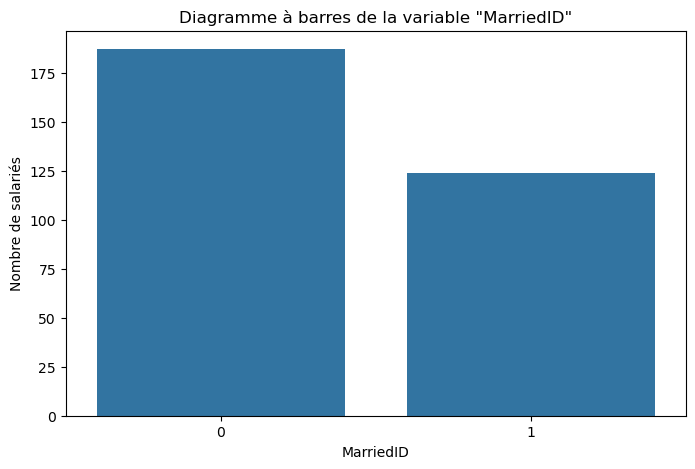

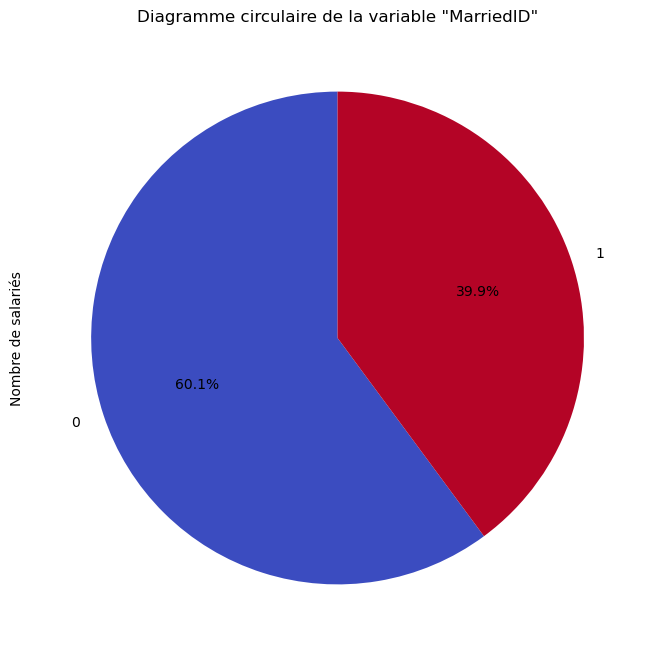

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\1666522713.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=MarriedID_counts.index, y=MarriedID_counts.values, palette='Set1')  # Utilisation de MarriedID_counts pour les x et y


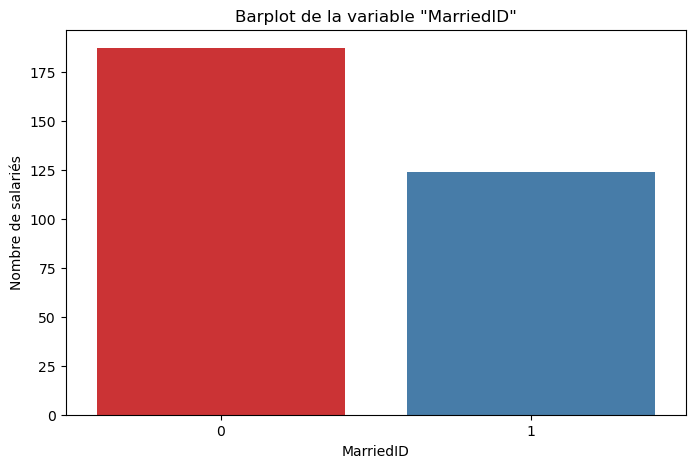

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'MarriedID'
# Remplacer 'MarriedID' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='MarriedID', data=df)  # Remplacer 'MarriedID' par la variable souhaitée
plt.title('Diagramme à barres de la variable "MarriedID"')
plt.xlabel('MarriedID')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
MarriedID_counts = df['MarriedID'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
MarriedID_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de MarriedID_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "MarriedID"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()


#3. Diagramme en barre
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=MarriedID_counts.index, y=MarriedID_counts.values, palette='Set1')  # Utilisation de MarriedID_counts pour les x et y
plt.title('Barplot de la variable "MarriedID"')
plt.xlabel('MarriedID')
plt.ylabel('Nombre de salariés')
plt.show()

In [56]:
# Fréquence des catégories
df['EmpStatusID'].value_counts()

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: count, dtype: int64

In [58]:
# Proportion des catégories
df['EmpStatusID'].value_counts(normalize=True)

EmpStatusID
1    0.591640
5    0.282958
3    0.045016
4    0.045016
2    0.035370
Name: proportion, dtype: float64

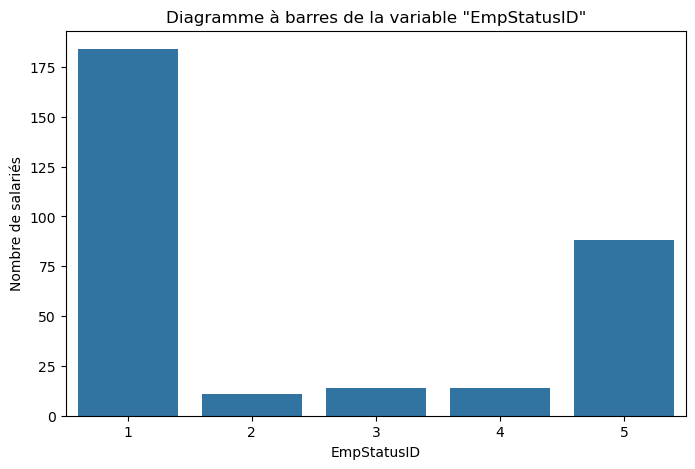

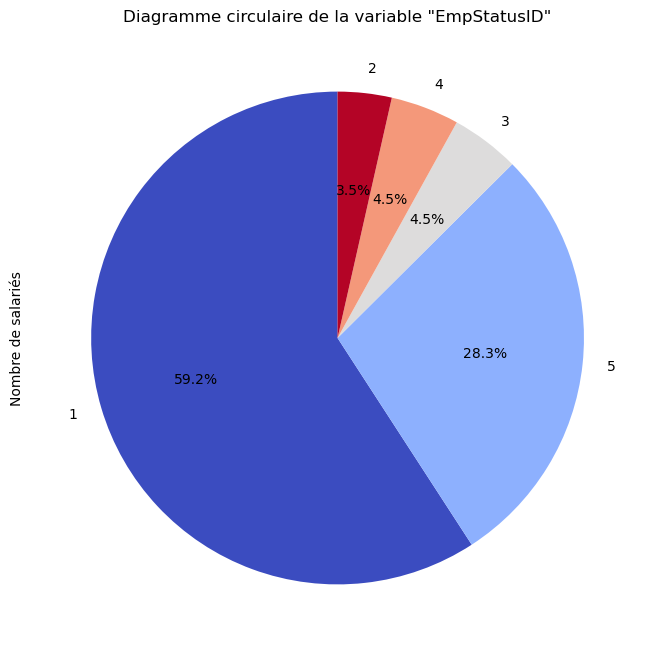

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\581346592.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=EmpStatusID_counts.index, y=EmpStatusID_counts.values, palette='Set1')  # Utilisation de EmpStatusID_counts pour les x et y


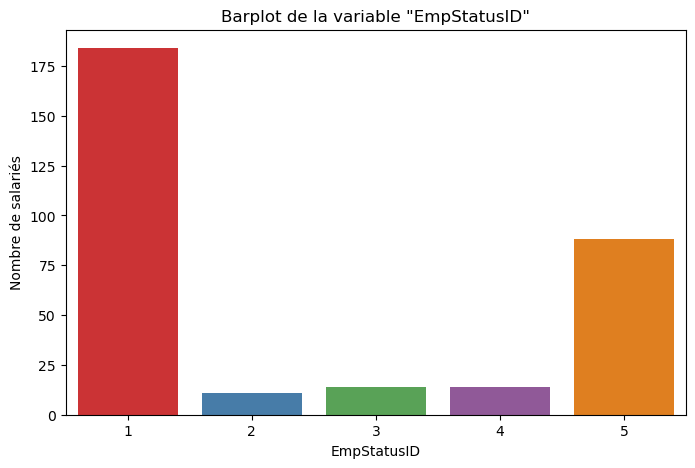

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'EmpStatusID'
# Remplacer 'EmpStatusID' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)
plt.figure(figsize=(8, 5))
sns.countplot(x='EmpStatusID', data=df)  # Remplacer 'EmpStatusID' par la variable souhaitée
plt.title('Diagramme à barres de la variable "EmpStatusID"')
plt.xlabel('EmpStatusID')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
EmpStatusID_counts = df['EmpStatusID'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
EmpStatusID_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de EmpStatusID_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "EmpStatusID"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()


#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=EmpStatusID_counts.index, y=EmpStatusID_counts.values, palette='Set1')  # Utilisation de EmpStatusID_counts pour les x et y
plt.title('Barplot de la variable "EmpStatusID"')
plt.xlabel('EmpStatusID')
plt.ylabel('Nombre de salariés')
plt.show()

In [62]:
# Fréquence des catégories
df['FromDiversityJobFairID'].value_counts()

FromDiversityJobFairID
0    282
1     29
Name: count, dtype: int64

In [64]:
# Proportion des catégories
df['FromDiversityJobFairID'].value_counts(normalize=True)

FromDiversityJobFairID
0    0.906752
1    0.093248
Name: proportion, dtype: float64

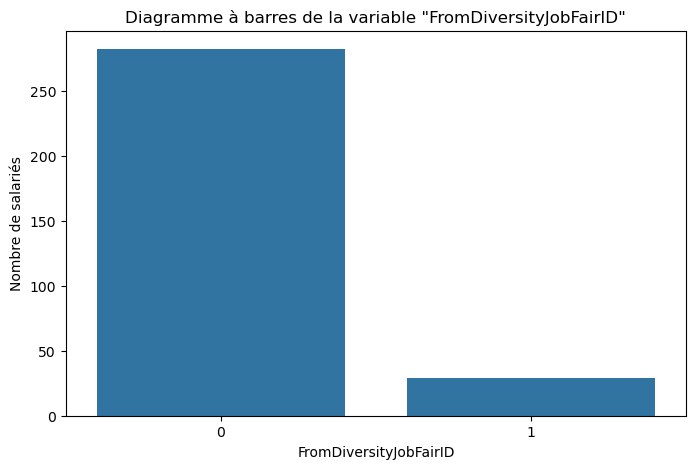

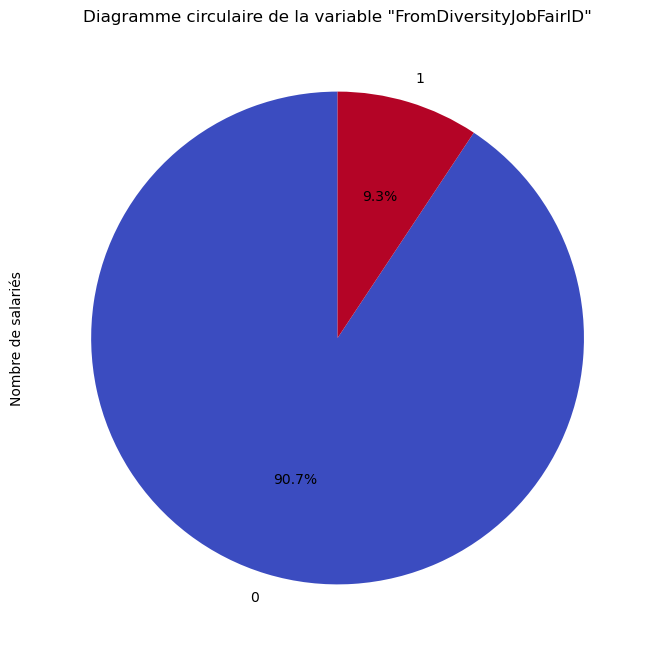

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\2797822349.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=FromDiversityJobFairID_counts.index, y=FromDiversityJobFairID_counts.values, palette='Set1')  # Utilisation de FromDiversityJobFairID_counts pour les x et y


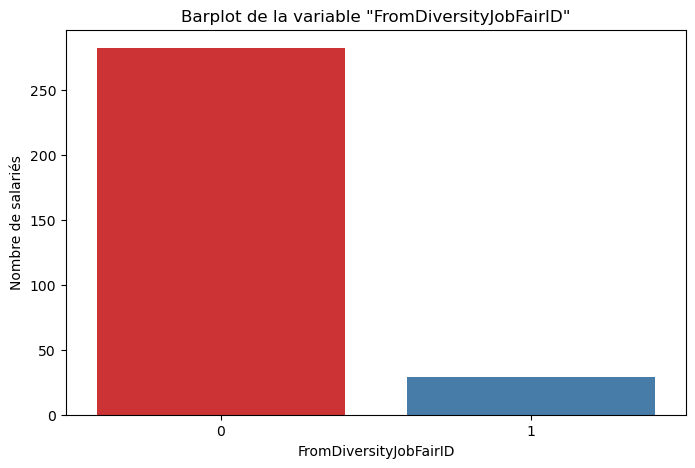

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'FromDiversityJobFairID'
# Remplacer 'FromDiversityJobFairID' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='FromDiversityJobFairID', data=df)  # Remplacer 'FromDiversityJobFairID' par la variable souhaitée
plt.title('Diagramme à barres de la variable "FromDiversityJobFairID"')
plt.xlabel('FromDiversityJobFairID')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
FromDiversityJobFairID_counts = df['FromDiversityJobFairID'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
FromDiversityJobFairID_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de FromDiversityJobFairID_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "FromDiversityJobFairID"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()


#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=FromDiversityJobFairID_counts.index, y=FromDiversityJobFairID_counts.values, palette='Set1')  # Utilisation de FromDiversityJobFairID_counts pour les x et y
plt.title('Barplot de la variable "FromDiversityJobFairID"')
plt.xlabel('FromDiversityJobFairID')
plt.ylabel('Nombre de salariés')
plt.show()

In [68]:
# Fréquence des catégories
df['RaceDesc'].value_counts()

RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64

In [70]:
# Proportion des catégories
df['RaceDesc'].value_counts(normalize=True)

RaceDesc
White                               0.601286
Black or African American           0.257235
Asian                               0.093248
Two or more races                   0.035370
American Indian or Alaska Native    0.009646
Hispanic                            0.003215
Name: proportion, dtype: float64

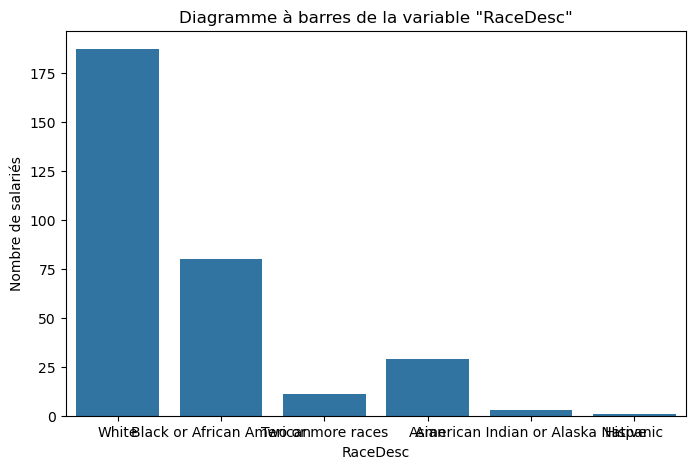

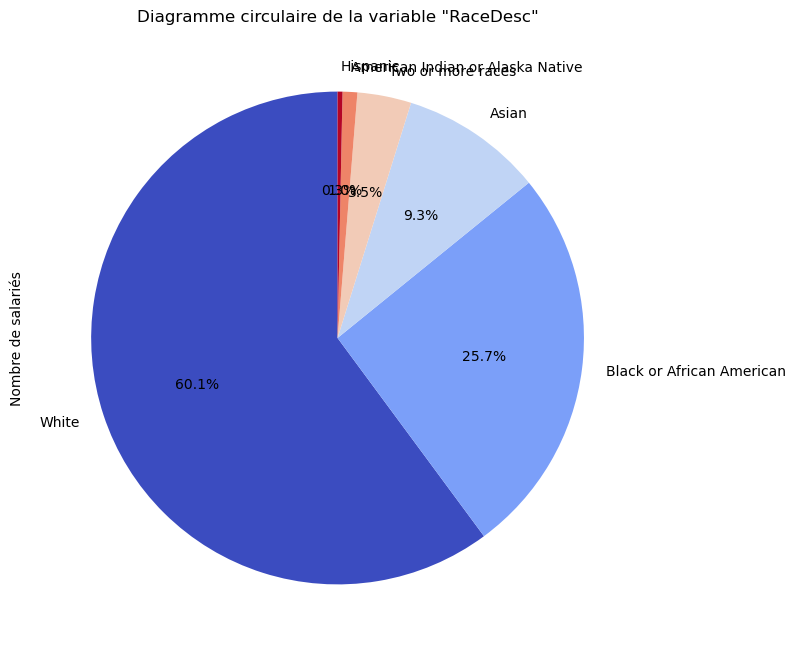

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\46987154.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=RaceDesc_counts.index, y=RaceDesc_counts.values, palette='Set1')  # Utilisation de RaceDesc_counts pour les x et y


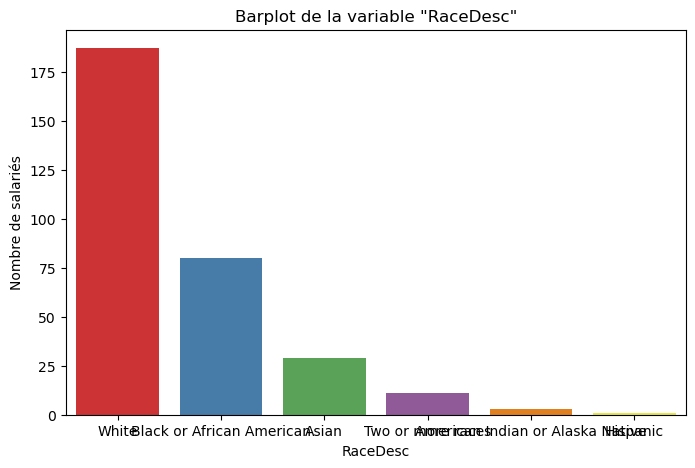

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'RaceDesc'
# Remplacer 'RaceDesc' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='RaceDesc', data=df)  # Remplacer 'RaceDesc' par la variable souhaitée
plt.title('Diagramme à barres de la variable "RaceDesc"')
plt.xlabel('RaceDesc')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
RaceDesc_counts = df['RaceDesc'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
RaceDesc_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de RaceDesc_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "RaceDesc"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()


#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=RaceDesc_counts.index, y=RaceDesc_counts.values, palette='Set1')  # Utilisation de RaceDesc_counts pour les x et y
plt.title('Barplot de la variable "RaceDesc"')
plt.xlabel('RaceDesc')
plt.ylabel('Nombre de salariés')
plt.show()

In [74]:
# Fréquence des catégories
df['HispanicLatino'].value_counts()

HispanicLatino
No     282
Yes     27
no       1
yes      1
Name: count, dtype: int64

In [76]:
# Proportion des catégories
df['HispanicLatino'].value_counts(normalize=True)

HispanicLatino
No     0.906752
Yes    0.086817
no     0.003215
yes    0.003215
Name: proportion, dtype: float64

In [78]:
df['HispanicLatino'] = df['HispanicLatino'].str.strip().str.capitalize()


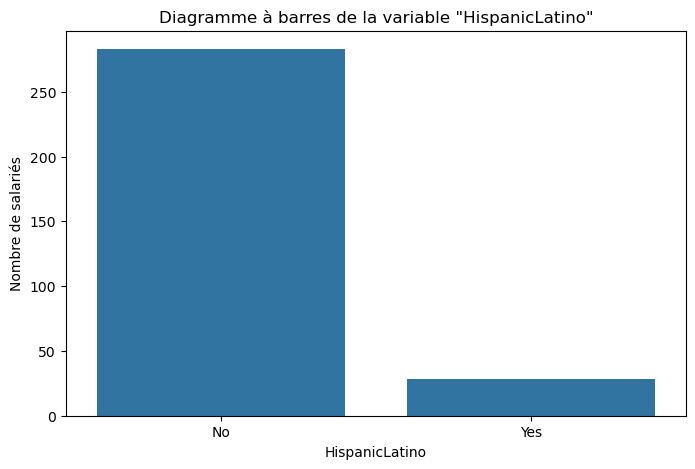

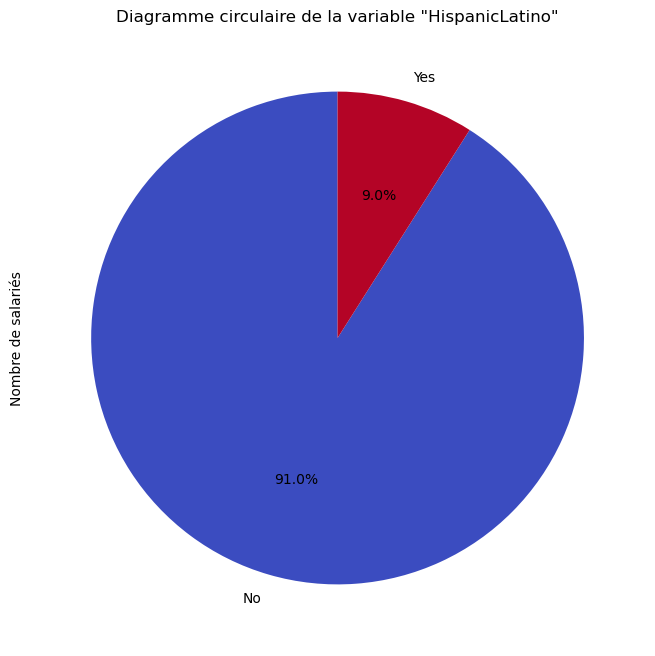

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\1906703879.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=HispanicLatino_counts.index, y=HispanicLatino_counts.values, palette='Set1')  # Utilisation de HispanicLatino_counts pour les x et y


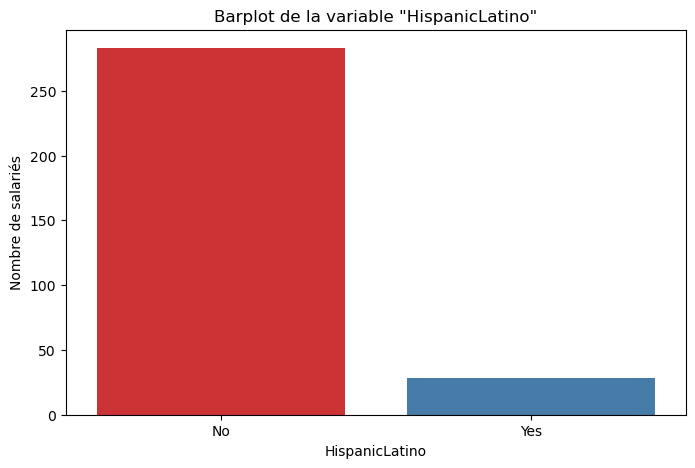

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'HispanicLatino'
# Remplacer 'HispanicLatino' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='HispanicLatino', data=df)  # Remplacer 'HispanicLatino' par la variable souhaitée
plt.title('Diagramme à barres de la variable "HispanicLatino"')
plt.xlabel('HispanicLatino')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
HispanicLatino_counts = df['HispanicLatino'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
HispanicLatino_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de HispanicLatino_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "HispanicLatino"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()


#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=HispanicLatino_counts.index, y=HispanicLatino_counts.values, palette='Set1')  # Utilisation de HispanicLatino_counts pour les x et y
plt.title('Barplot de la variable "HispanicLatino"')
plt.xlabel('HispanicLatino')
plt.ylabel('Nombre de salariés')
plt.show()

In [82]:
# Fréquence des catégories
df['CitizenDesc'].value_counts()

CitizenDesc
US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: count, dtype: int64

In [84]:
# Proportion des catégories
df['CitizenDesc'].value_counts(normalize=True)

CitizenDesc
US Citizen             0.948553
Eligible NonCitizen    0.038585
Non-Citizen            0.012862
Name: proportion, dtype: float64

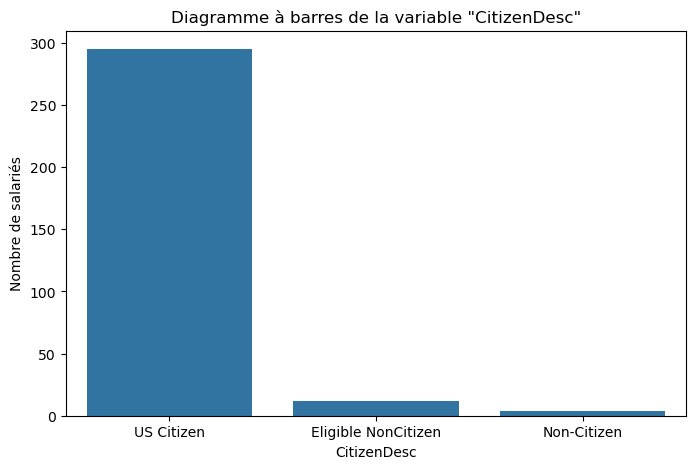

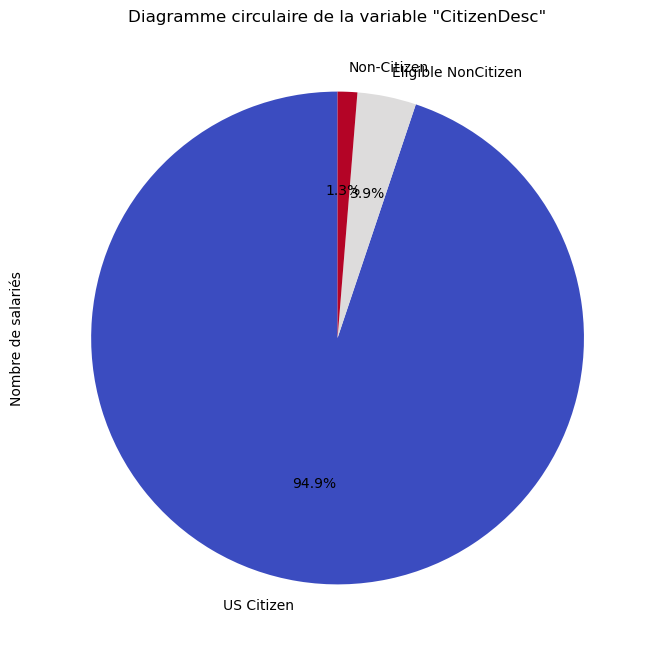

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\1973667573.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=CitizenDesc_counts.index, y=CitizenDesc_counts.values, palette='Set1')  # Utilisation de CitizenDesc_counts pour les x et y


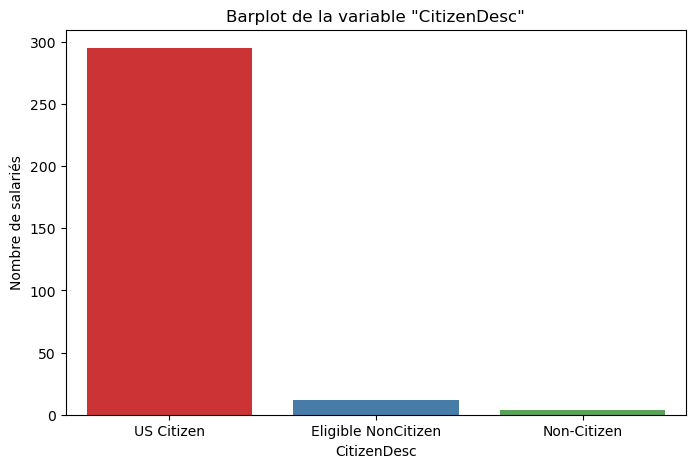

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'CitizenDesc'
# Remplacer 'CitizenDesc' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='CitizenDesc', data=df)  # Remplacer 'CitizenDesc' par la variable souhaitée
plt.title('Diagramme à barres de la variable "CitizenDesc"')
plt.xlabel('CitizenDesc')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
CitizenDesc_counts = df['CitizenDesc'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
CitizenDesc_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de CitizenDesc_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "CitizenDesc"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=CitizenDesc_counts.index, y=CitizenDesc_counts.values, palette='Set1')  # Utilisation de CitizenDesc_counts pour les x et y
plt.title('Barplot de la variable "CitizenDesc"')
plt.xlabel('CitizenDesc')
plt.ylabel('Nombre de salariés')
plt.show()

In [88]:
# Fréquence des catégories
df['Department'].value_counts()

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

In [90]:
# Proportion des catégories
df['Department'].value_counts(normalize=True)

Department
Production              0.672026
IT/IS                   0.160772
Sales                   0.099678
Software Engineering    0.035370
Admin Offices           0.028939
Executive Office        0.003215
Name: proportion, dtype: float64

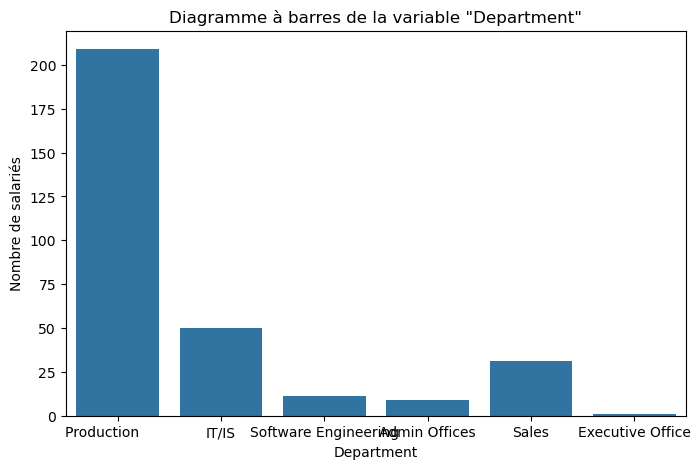

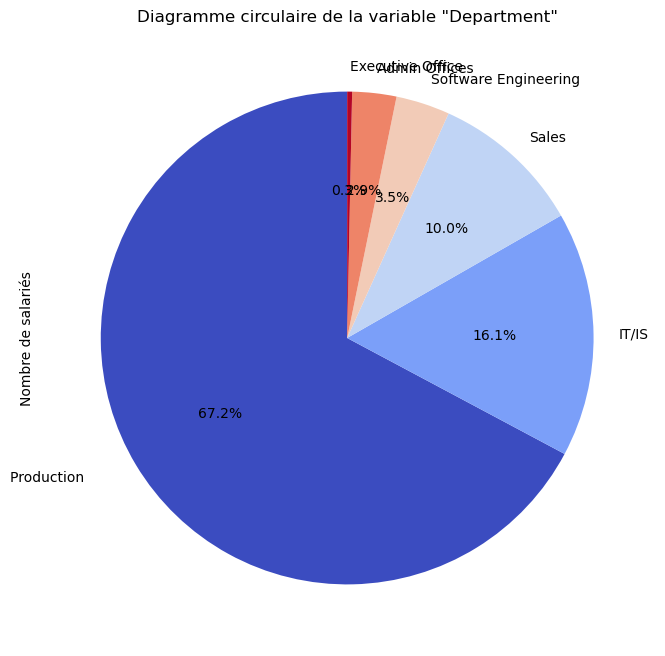

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\3060537565.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Department_counts.index, y=Department_counts.values, palette='Set1')  # Utilisation de Department_counts pour les x et y


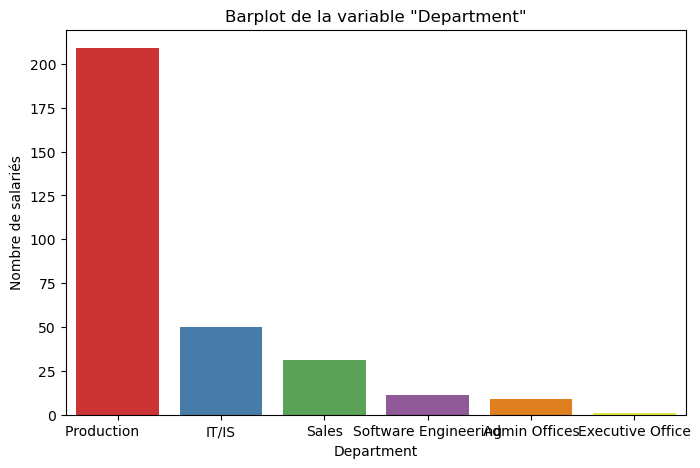

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'Department'
# Remplacer 'Department' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='Department', data=df)  # Remplacer 'Department' par la variable souhaitée
plt.title('Diagramme à barres de la variable "Department"')
plt.xlabel('Department')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
Department_counts = df['Department'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
Department_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de Department_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "Department"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=Department_counts.index, y=Department_counts.values, palette='Set1')  # Utilisation de Department_counts pour les x et y
plt.title('Barplot de la variable "Department"')
plt.xlabel('Department')
plt.ylabel('Nombre de salariés')
plt.show()

In [94]:
# Fréquence des catégories
df['EmploymentStatus'].value_counts()

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

In [96]:
# Proportion des catégories
df['EmploymentStatus'].value_counts(normalize=True)

EmploymentStatus
Active                    0.665595
Voluntarily Terminated    0.282958
Terminated for Cause      0.051447
Name: proportion, dtype: float64

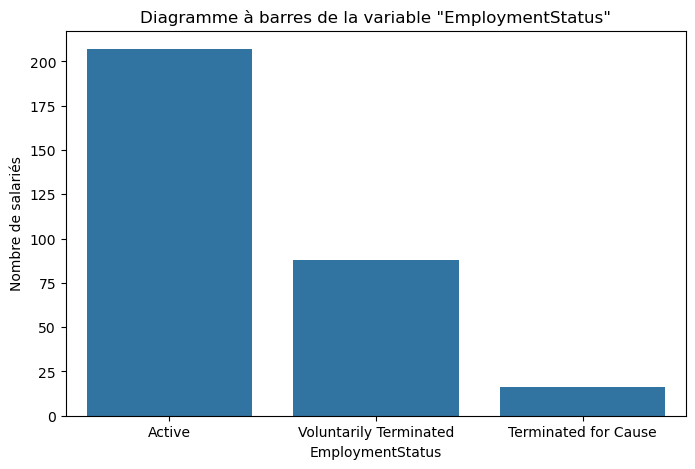

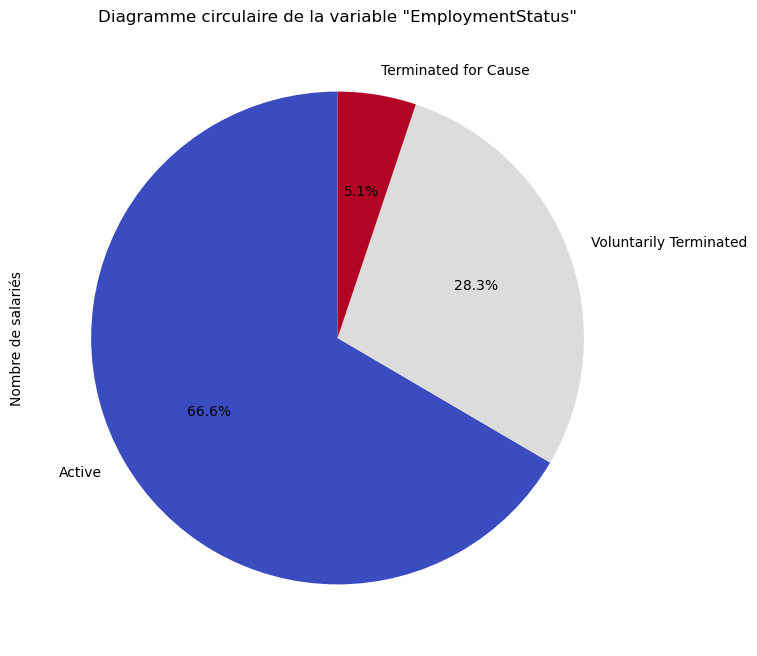

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\2566797951.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=EmploymentStatus_counts.index, y=EmploymentStatus_counts.values, palette='Set1')  # Utilisation de EmploymentStatus_counts pour les x et y


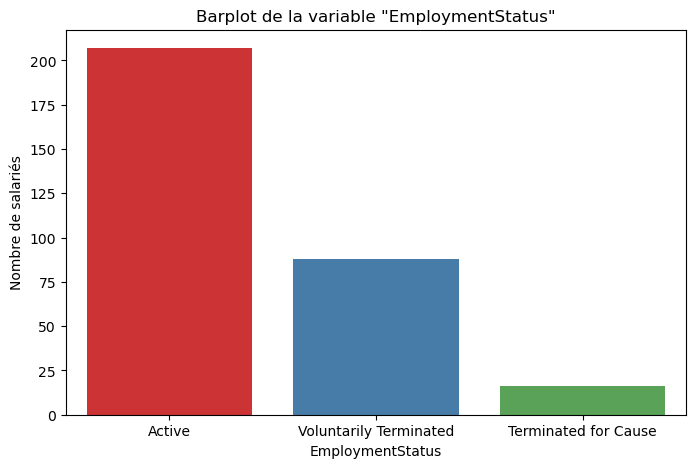

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'EmploymentStatus'
# Remplacer 'EmploymentStatus' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='EmploymentStatus', data=df)  # Remplacer 'EmploymentStatus' par la variable souhaitée
plt.title('Diagramme à barres de la variable "EmploymentStatus"')
plt.xlabel('EmploymentStatus')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
EmploymentStatus_counts = df['EmploymentStatus'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
EmploymentStatus_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de EmploymentStatus_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "EmploymentStatus"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=EmploymentStatus_counts.index, y=EmploymentStatus_counts.values, palette='Set1')  # Utilisation de EmploymentStatus_counts pour les x et y
plt.title('Barplot de la variable "EmploymentStatus"')
plt.xlabel('EmploymentStatus')
plt.ylabel('Nombre de salariés')
plt.show()

In [100]:
# Fréquence des catégories
df['MaritalDesc'].value_counts()

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

In [102]:
# Proportion des catégories
df['MaritalDesc'].value_counts(normalize=True)

MaritalDesc
Single       0.440514
Married      0.398714
Divorced     0.096463
Separated    0.038585
Widowed      0.025723
Name: proportion, dtype: float64

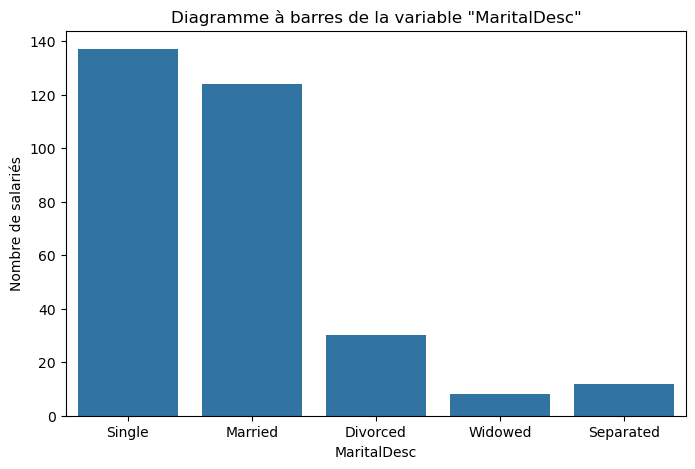

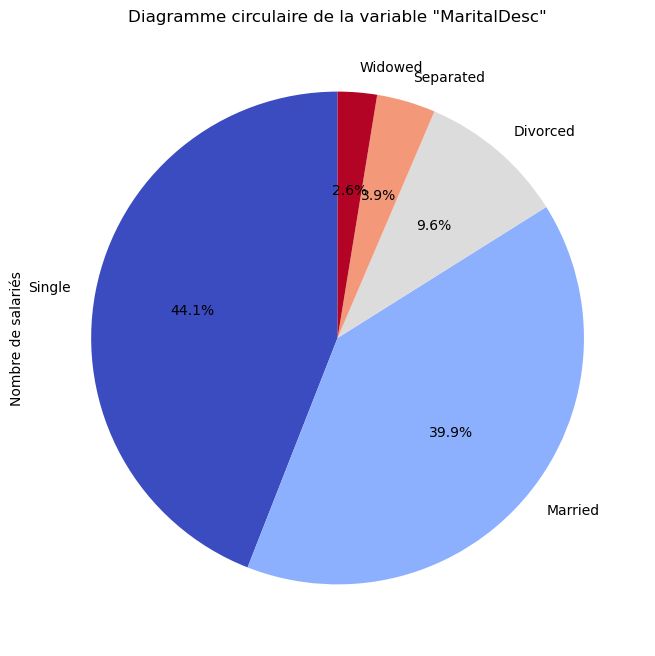

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\2932572602.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=MaritalDesc_counts.index, y=MaritalDesc_counts.values, palette='Set1')  # Utilisation de MaritalDesc_counts pour les x et y


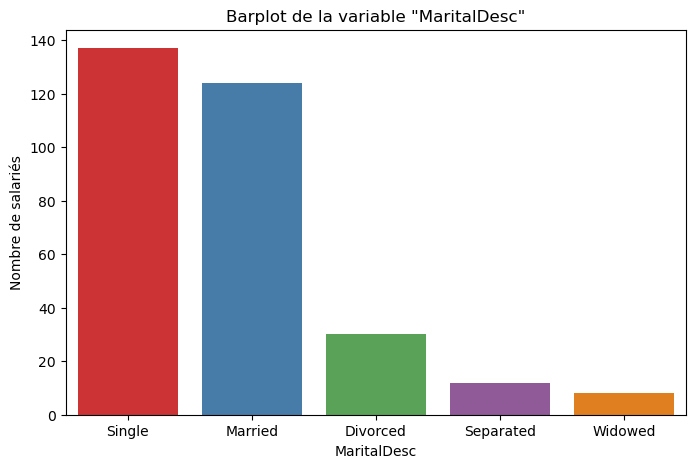

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la variable 'MaritalDesc'
# Remplacer 'MaritalDesc' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalDesc', data=df)  # Remplacer 'MaritalDesc' par la variable souhaitée
plt.title('Diagramme à barres de la variable "MaritalDesc"')
plt.xlabel('MaritalDesc')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
MaritalDesc_counts = df['MaritalDesc'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
MaritalDesc_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de MaritalDesc_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "MaritalDesc"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=MaritalDesc_counts.index, y=MaritalDesc_counts.values, palette='Set1')  # Utilisation de MaritalDesc_counts pour les x et y
plt.title('Barplot de la variable "MaritalDesc"')
plt.xlabel('MaritalDesc')
plt.ylabel('Nombre de salariés')
plt.show()

In [106]:
# Fréquence des catégories
df['PerformanceScore'].value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

In [108]:
# Proportion des catégories
df['PerformanceScore'].value_counts(normalize=True)

PerformanceScore
Fully Meets          0.781350
Exceeds              0.118971
Needs Improvement    0.057878
PIP                  0.041801
Name: proportion, dtype: float64

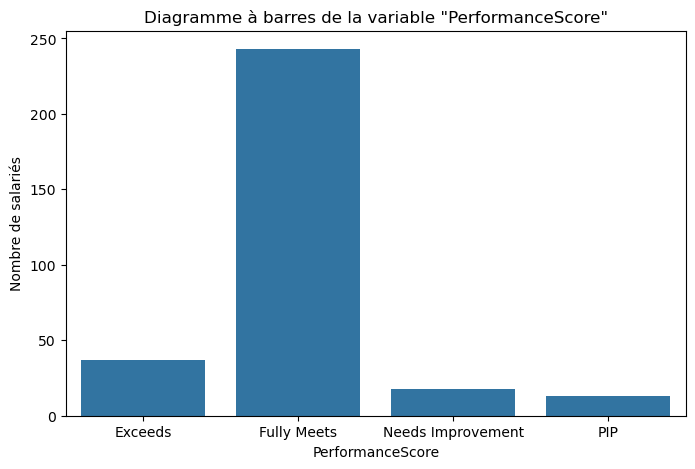

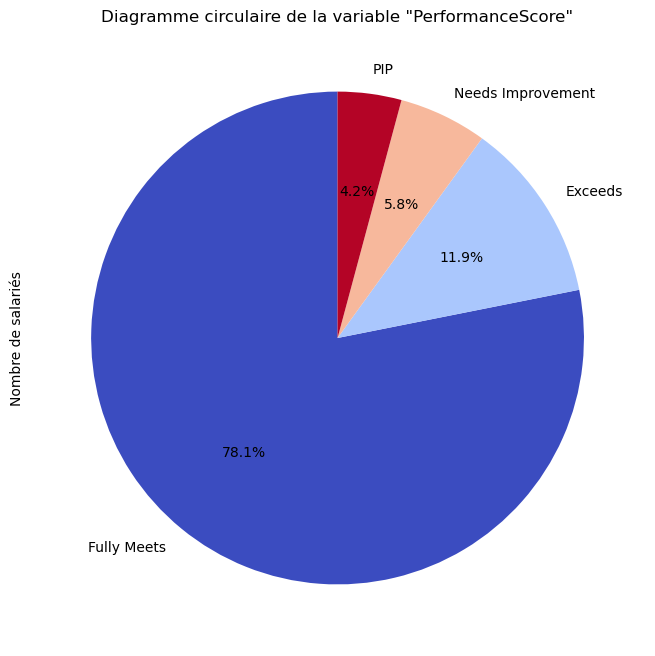

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\2151789683.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=PerformanceScore_counts.index, y=PerformanceScore_counts.values, palette='Set1')  # Utilisation de PerformanceScore_counts pour les x et y


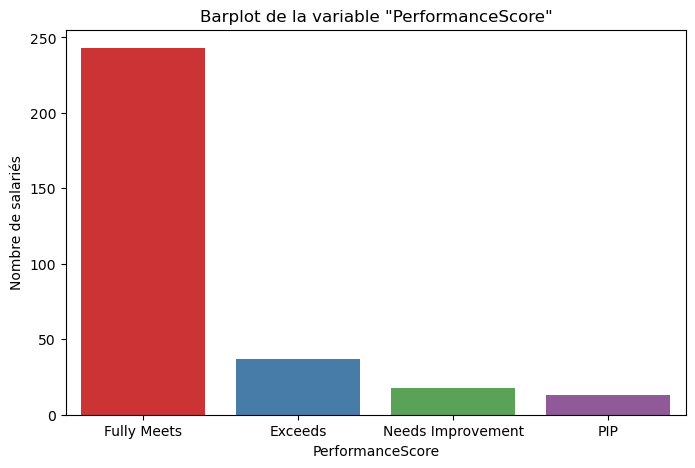

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacer 'PerformanceScore' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='PerformanceScore', data=df)  # Remplacer 'PerformanceScore' par la variable souhaitée
plt.title('Diagramme à barres de la variable "PerformanceScore"')
plt.xlabel('PerformanceScore')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
PerformanceScore_counts = df['PerformanceScore'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
PerformanceScore_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de PerformanceScore_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "PerformanceScore"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=PerformanceScore_counts.index, y=PerformanceScore_counts.values, palette='Set1')  # Utilisation de PerformanceScore_counts pour les x et y
plt.title('Barplot de la variable "PerformanceScore"')
plt.xlabel('PerformanceScore')
plt.ylabel('Nombre de salariés')
plt.show()

In [112]:
# Fréquence des catégories
df['EmpSatisfaction'].value_counts()

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

In [114]:
# Proportion des catégories
df['EmpSatisfaction'].value_counts(normalize=True)

EmpSatisfaction
3    0.347267
5    0.315113
4    0.302251
2    0.028939
1    0.006431
Name: proportion, dtype: float64

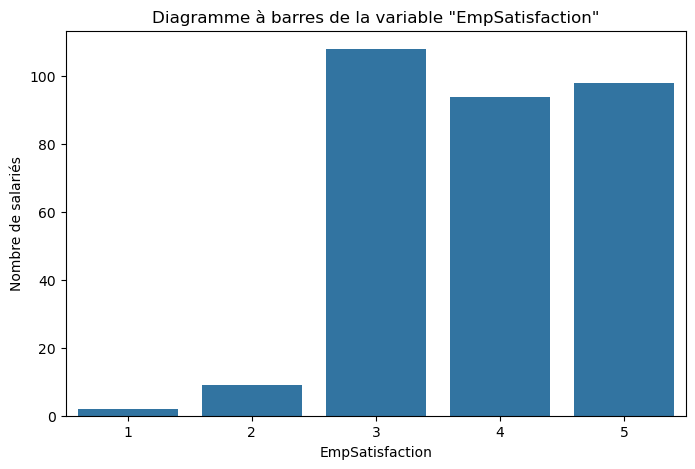

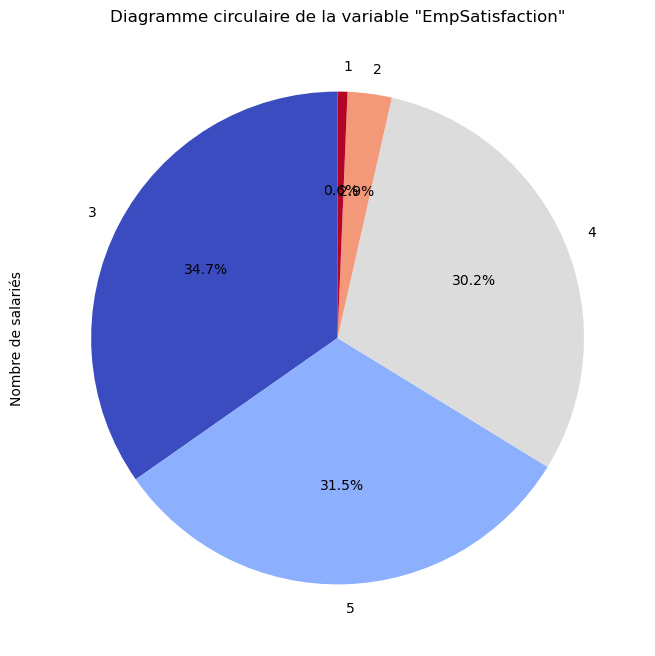

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\1126211446.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=EmpSatisfaction_counts.index, y=EmpSatisfaction_counts.values, palette='Set1')  # Utilisation de EmpSatisfaction_counts pour les x et y


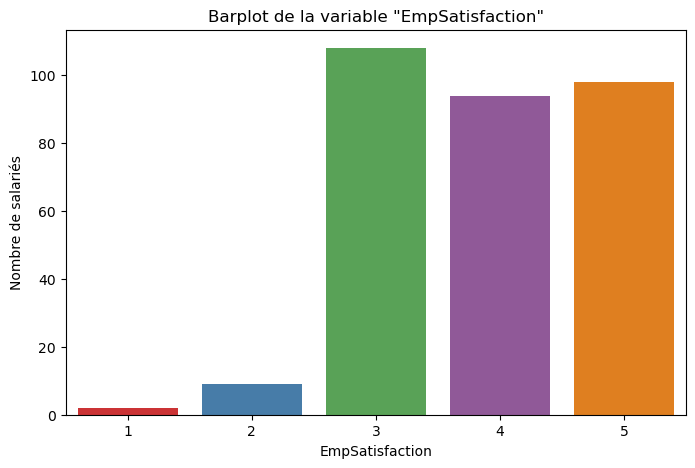

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacer 'EmpSatisfaction' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='EmpSatisfaction', data=df)  # Remplacer 'EmpSatisfaction' par la variable souhaitée
plt.title('Diagramme à barres de la variable "EmpSatisfaction"')
plt.xlabel('EmpSatisfaction')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
EmpSatisfaction_counts = df['EmpSatisfaction'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
EmpSatisfaction_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de EmpSatisfaction_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "EmpSatisfaction"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=EmpSatisfaction_counts.index, y=EmpSatisfaction_counts.values, palette='Set1')  # Utilisation de EmpSatisfaction_counts pour les x et y
plt.title('Barplot de la variable "EmpSatisfaction"')
plt.xlabel('EmpSatisfaction')
plt.ylabel('Nombre de salariés')
plt.show()

In [118]:
# Fréquence des catégories
df['Termd'].value_counts()

Termd
0    207
1    104
Name: count, dtype: int64

In [120]:
# Proportion des catégories
df['Termd'].value_counts(normalize=True)

Termd
0    0.665595
1    0.334405
Name: proportion, dtype: float64

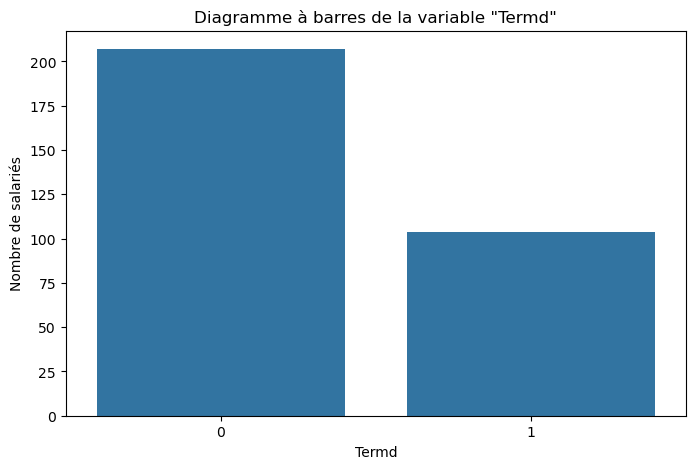

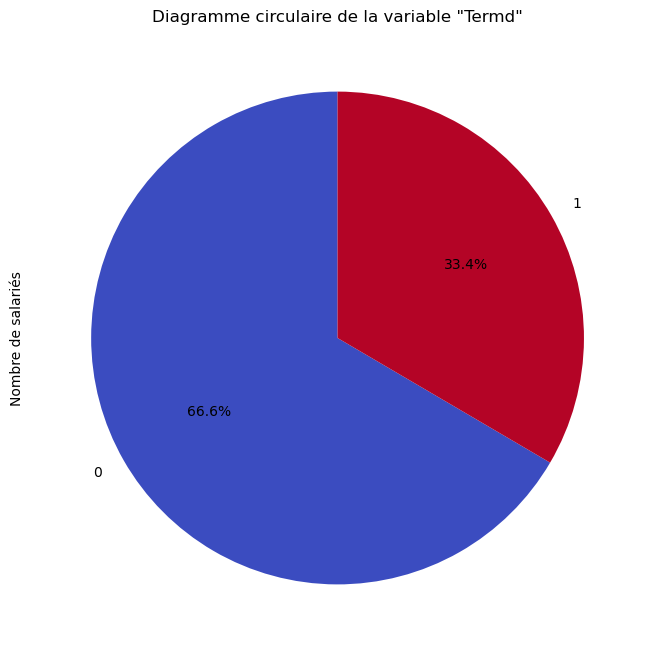

C:\Users\louis\AppData\Local\Temp\ipykernel_13244\3529188995.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Termd_counts.index, y=Termd_counts.values, palette='Set1')  # Utilisation de Termd_counts pour les x et y


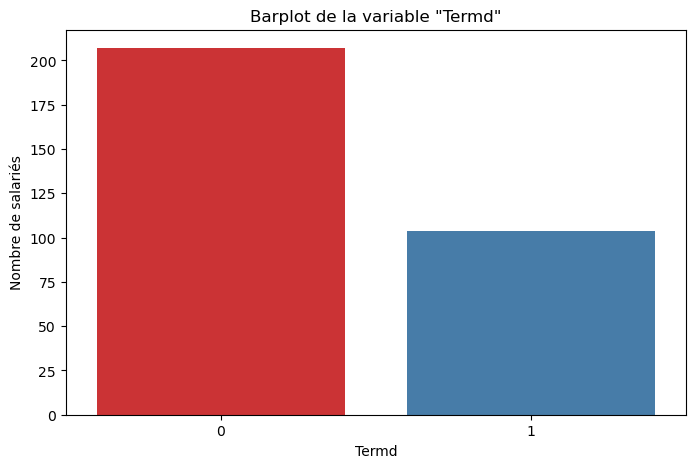

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacer 'Termd' par le nom de la variable catégorielle de ton choix

# Diagramme à barres (Countplot)

plt.figure(figsize=(8, 5))
sns.countplot(x='Termd', data=df)  # Remplacer 'Termd' par la variable souhaitée
plt.title('Diagramme à barres de la variable "Termd"')
plt.xlabel('Termd')
plt.ylabel('Nombre de salariés')
plt.show()

# 2. Diagramme circulaire (Pie chart)
# Calcul des value_counts à part
Termd_counts = df['Termd'].value_counts()

# Diagramme circulaire avec les valeurs calculées à part
plt.figure(figsize=(8, 8))
Termd_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))  # Utilisation de Termd_counts pour le pie chart
plt.title('Diagramme circulaire de la variable "Termd"')
plt.ylabel('Nombre de salariés')  # Supprime le label de l'axe y pour un visuel plus propre
plt.show()

#3. Diagramme en barres
# Barplot avec les valeurs calculées à part
plt.figure(figsize=(8, 5))
sns.barplot(x=Termd_counts.index, y=Termd_counts.values, palette='Set1')  # Utilisation de Termd_counts pour les x et y
plt.title('Barplot de la variable "Termd"')
plt.xlabel('Termd')
plt.ylabel('Nombre de salariés')
plt.show()